In [1]:
from utils.draw import draw_custom_weighted_graph
from ga.tsp_ga_din_crossover import TSPGA 
import numpy as np

In [2]:
import json
def write_dict_to_file(filename, dictionary):
    with open(filename, 'w') as file:
        json.dump(dictionary, file, indent=4)

def load_dict_from_file(filename):
    with open(filename, 'r') as file:
        dictionary = json.load(file)
    return dictionary

In [3]:
from itertools import permutations
import random
from tqdm import tqdm
def generate_network(num_nodes, rand_a, rand_b):
    nodes_list = [x for x in range(num_nodes)]
    edges = list(permutations(nodes_list, 2))
    edges_w = [(*x, random.randint(rand_a,rand_b)) for x in edges]

    return nodes_list, edges_w

In [4]:
edge

NameError: name 'edge' is not defined

# Testing 8 nodes

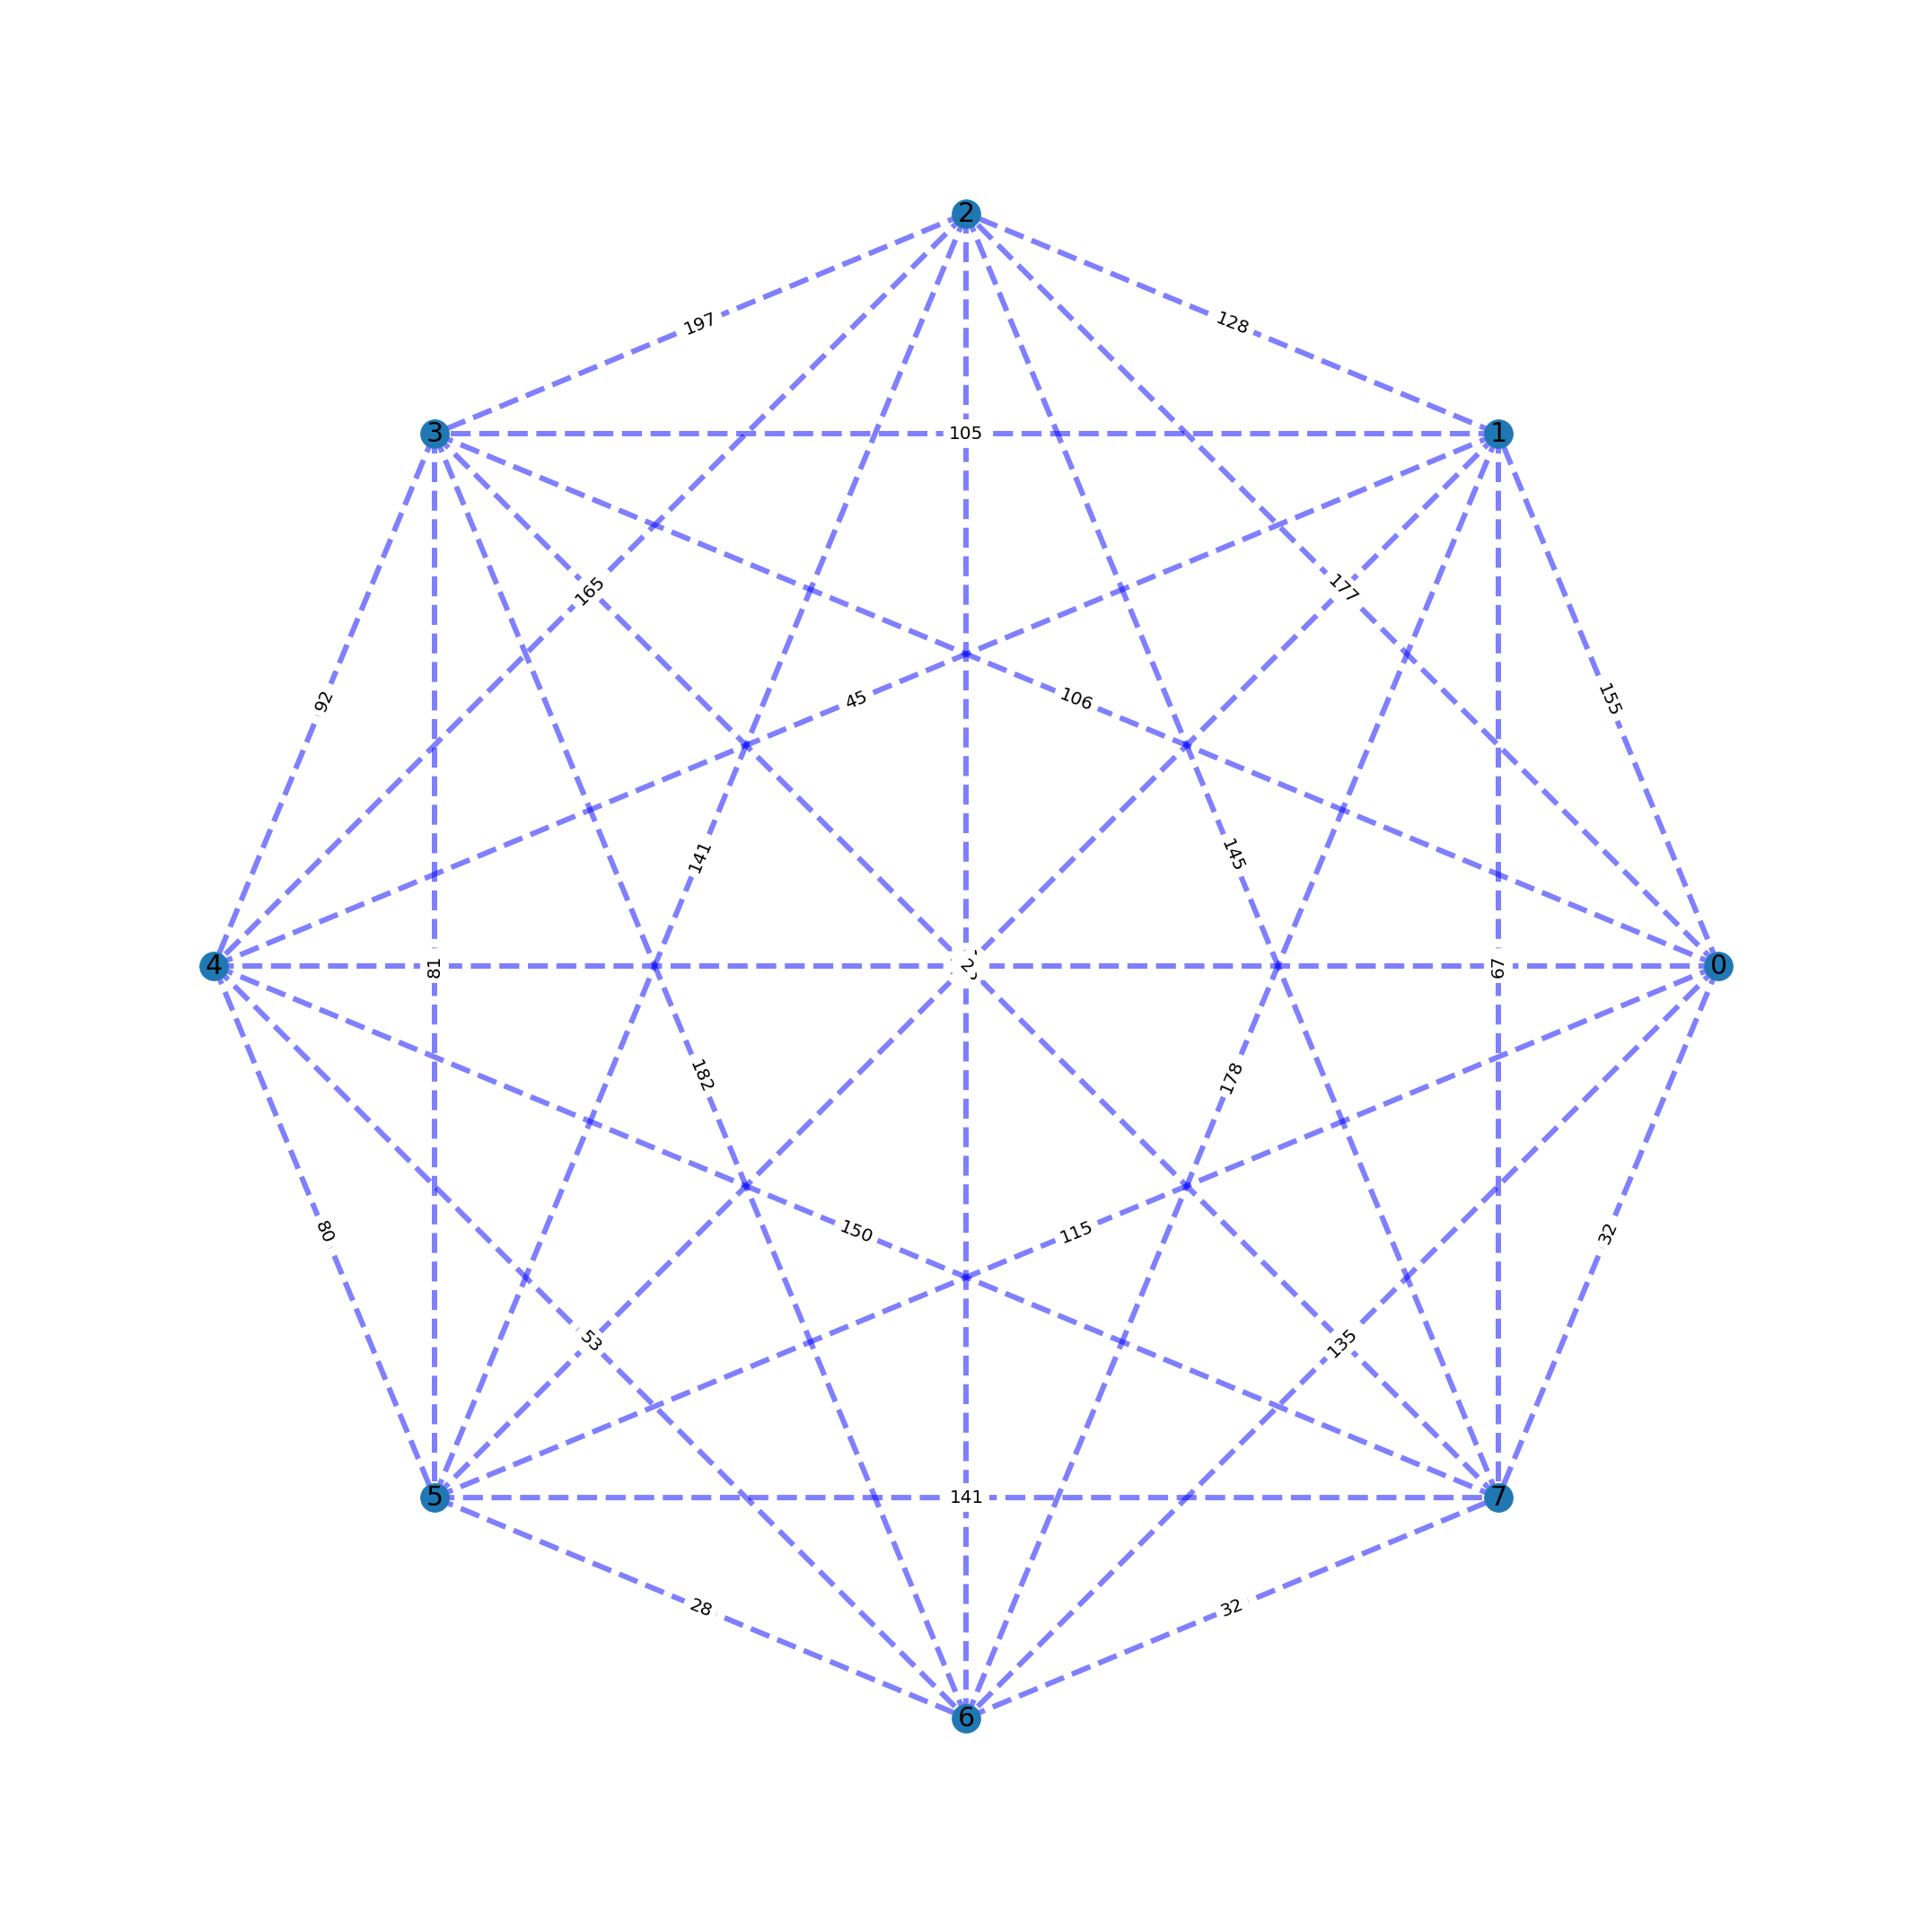

In [5]:
NUM_NODES = 8
nodes_list, edges_w = generate_network(num_nodes=NUM_NODES,rand_a=0,rand_b=200)
draw_custom_weighted_graph(node_list=nodes_list, edge_weight_list=edges_w)

Step: 1 - Cost: 685
Step: 2 - Cost: 685
Step: 3 - Cost: 614


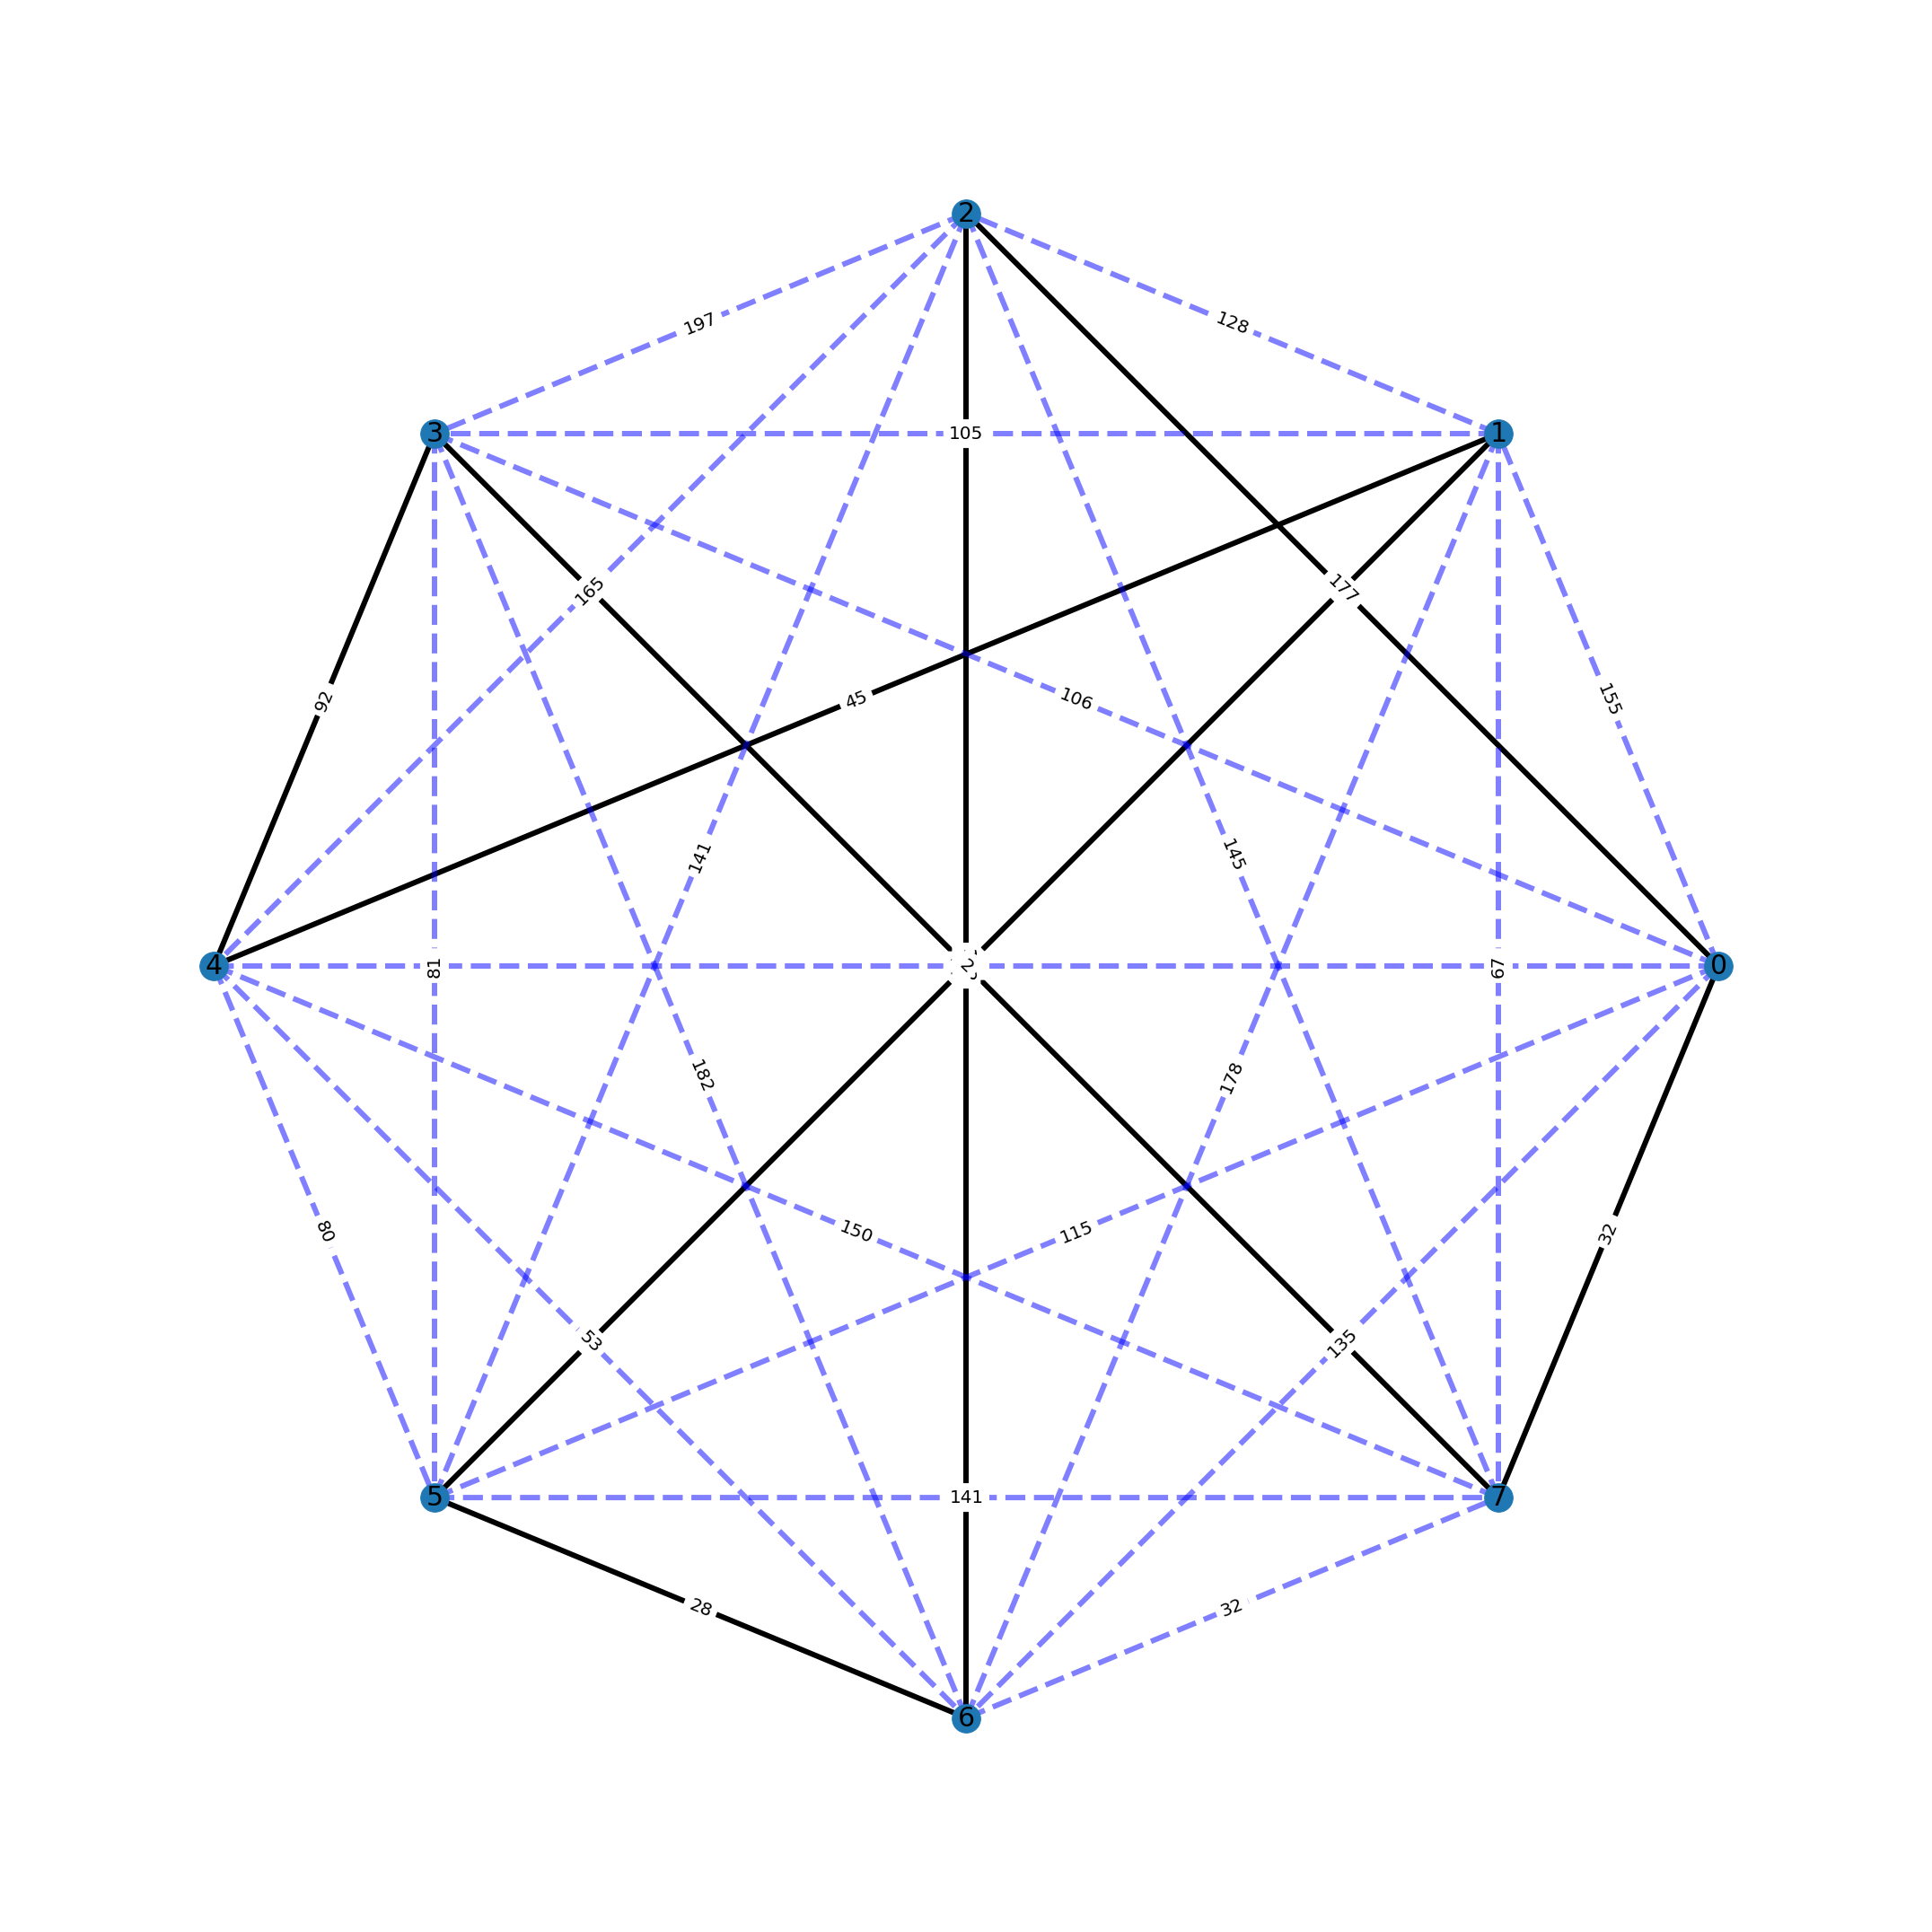

Step: 4 - Cost: 614
Step: 5 - Cost: 614
Step: 6 - Cost: 614


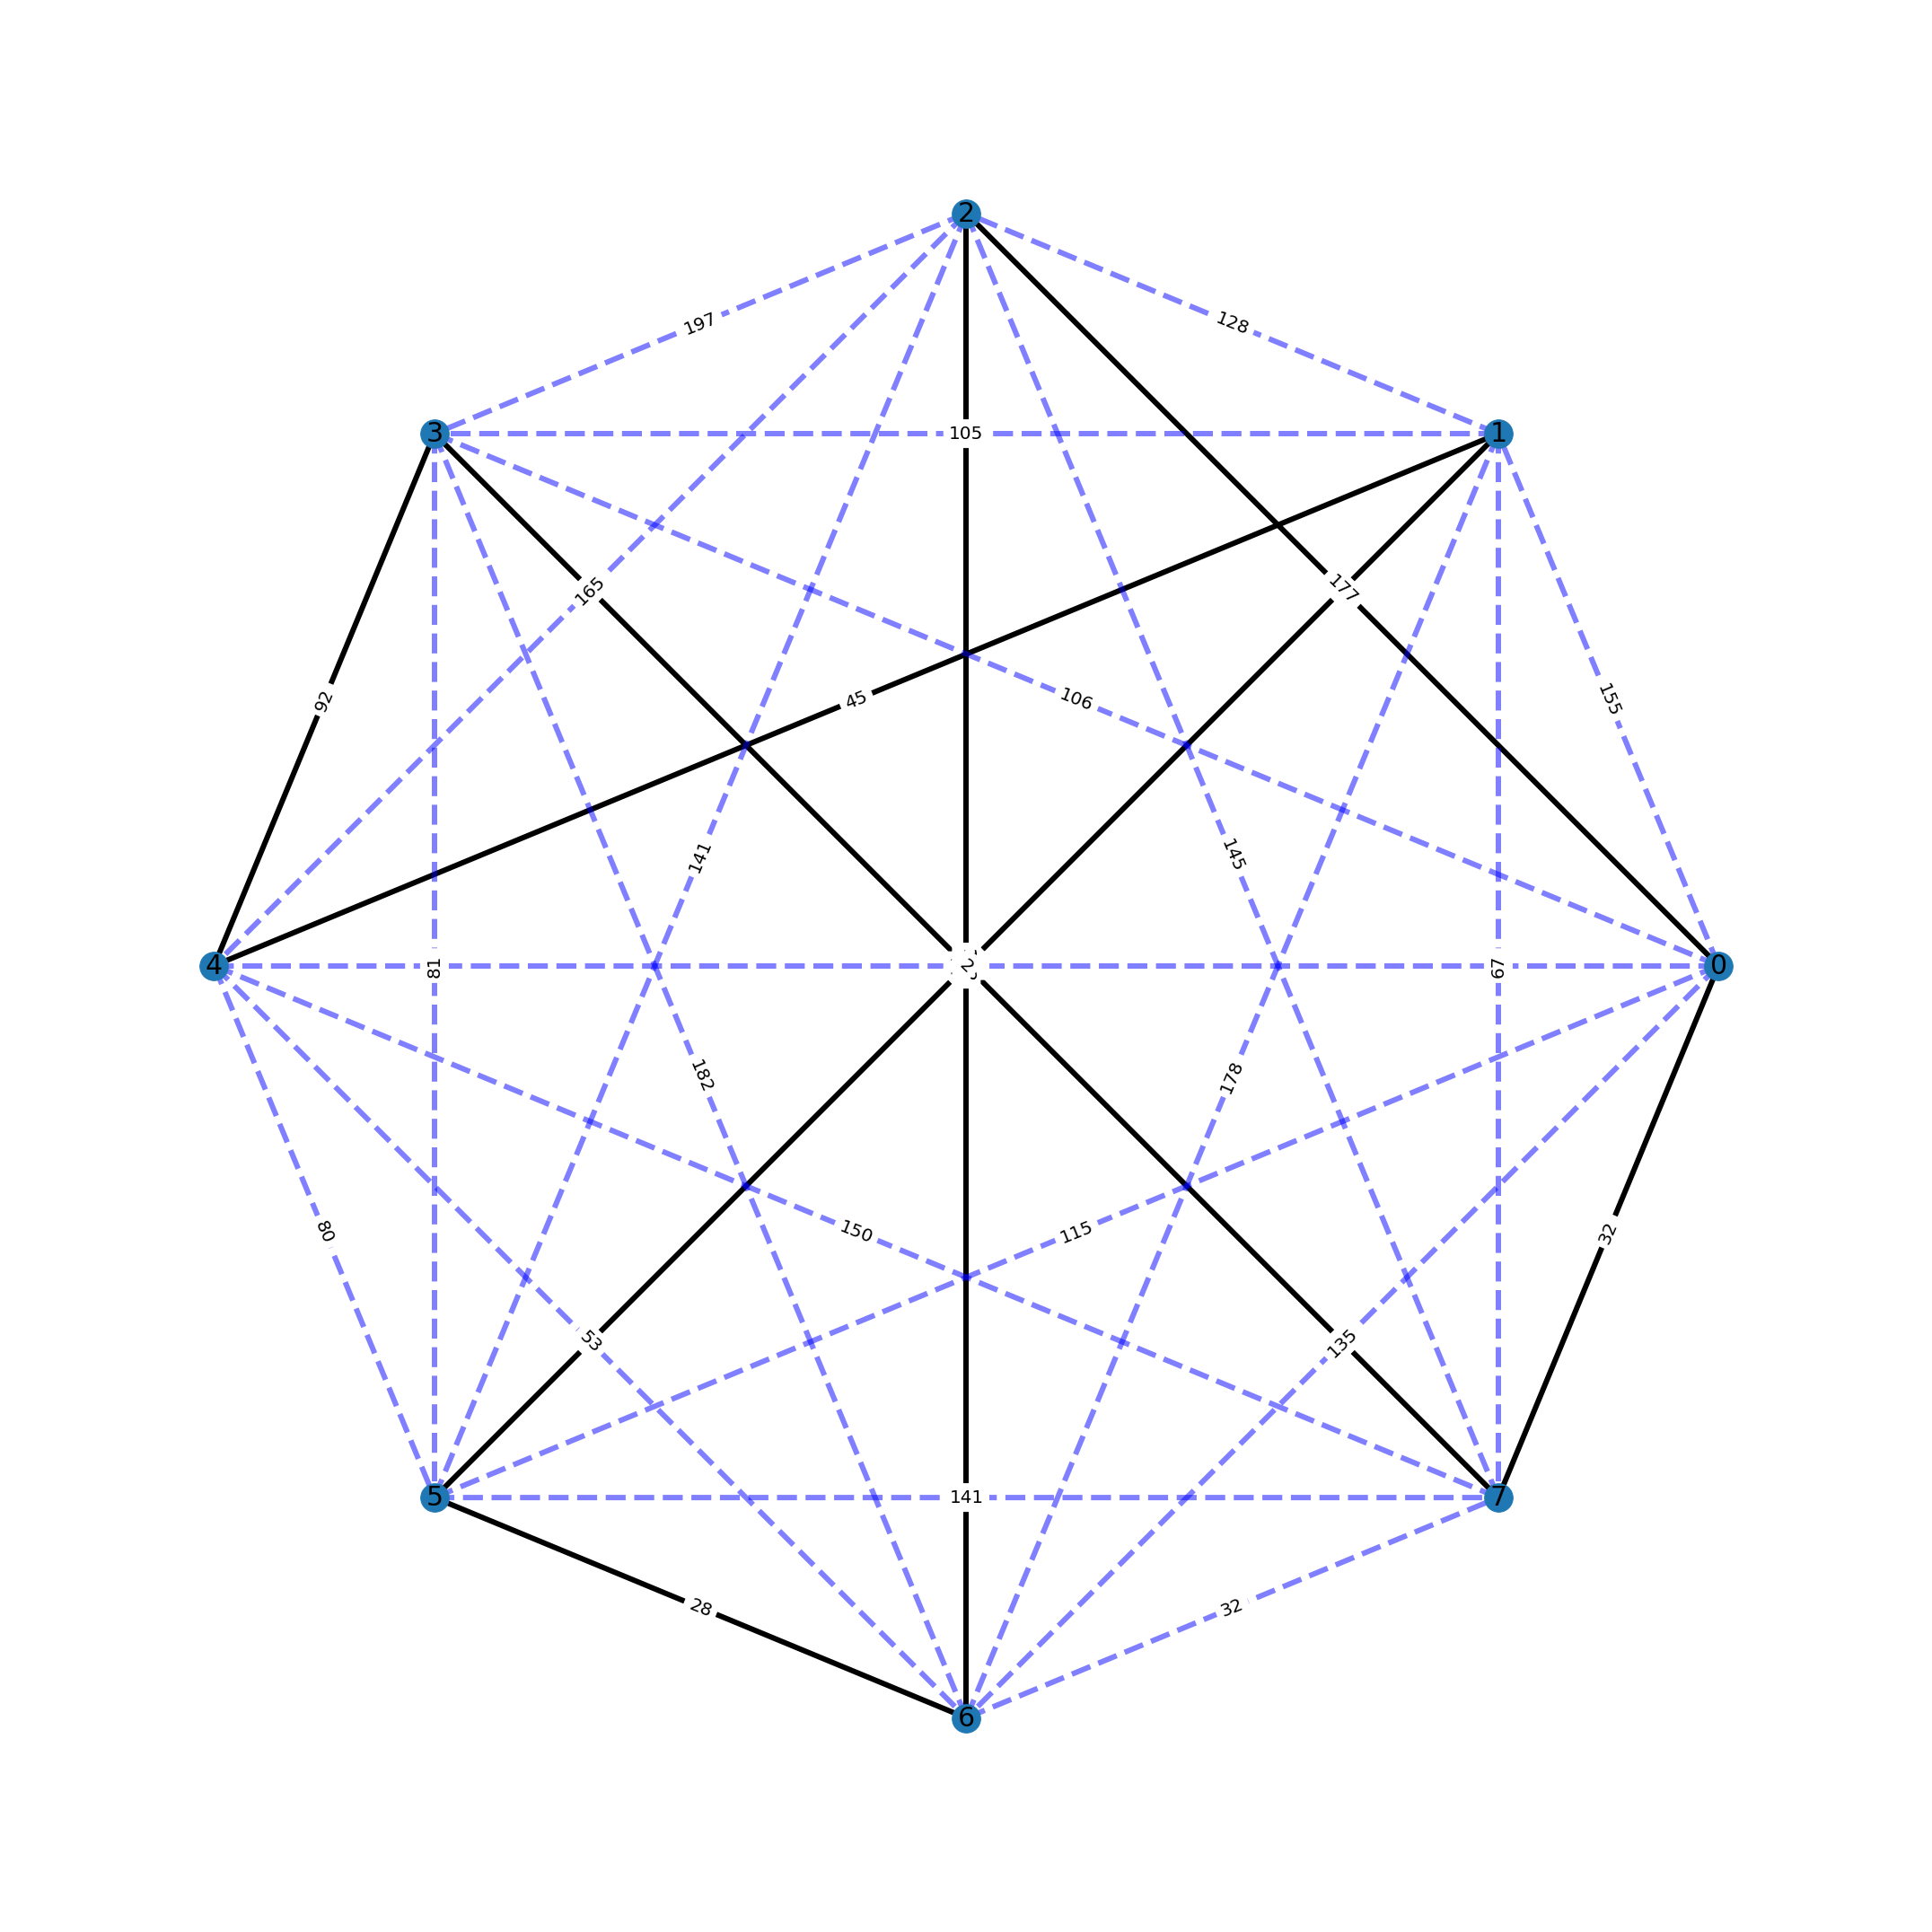

Step: 7 - Cost: 599
Step: 8 - Cost: 597
Step: 9 - Cost: 597


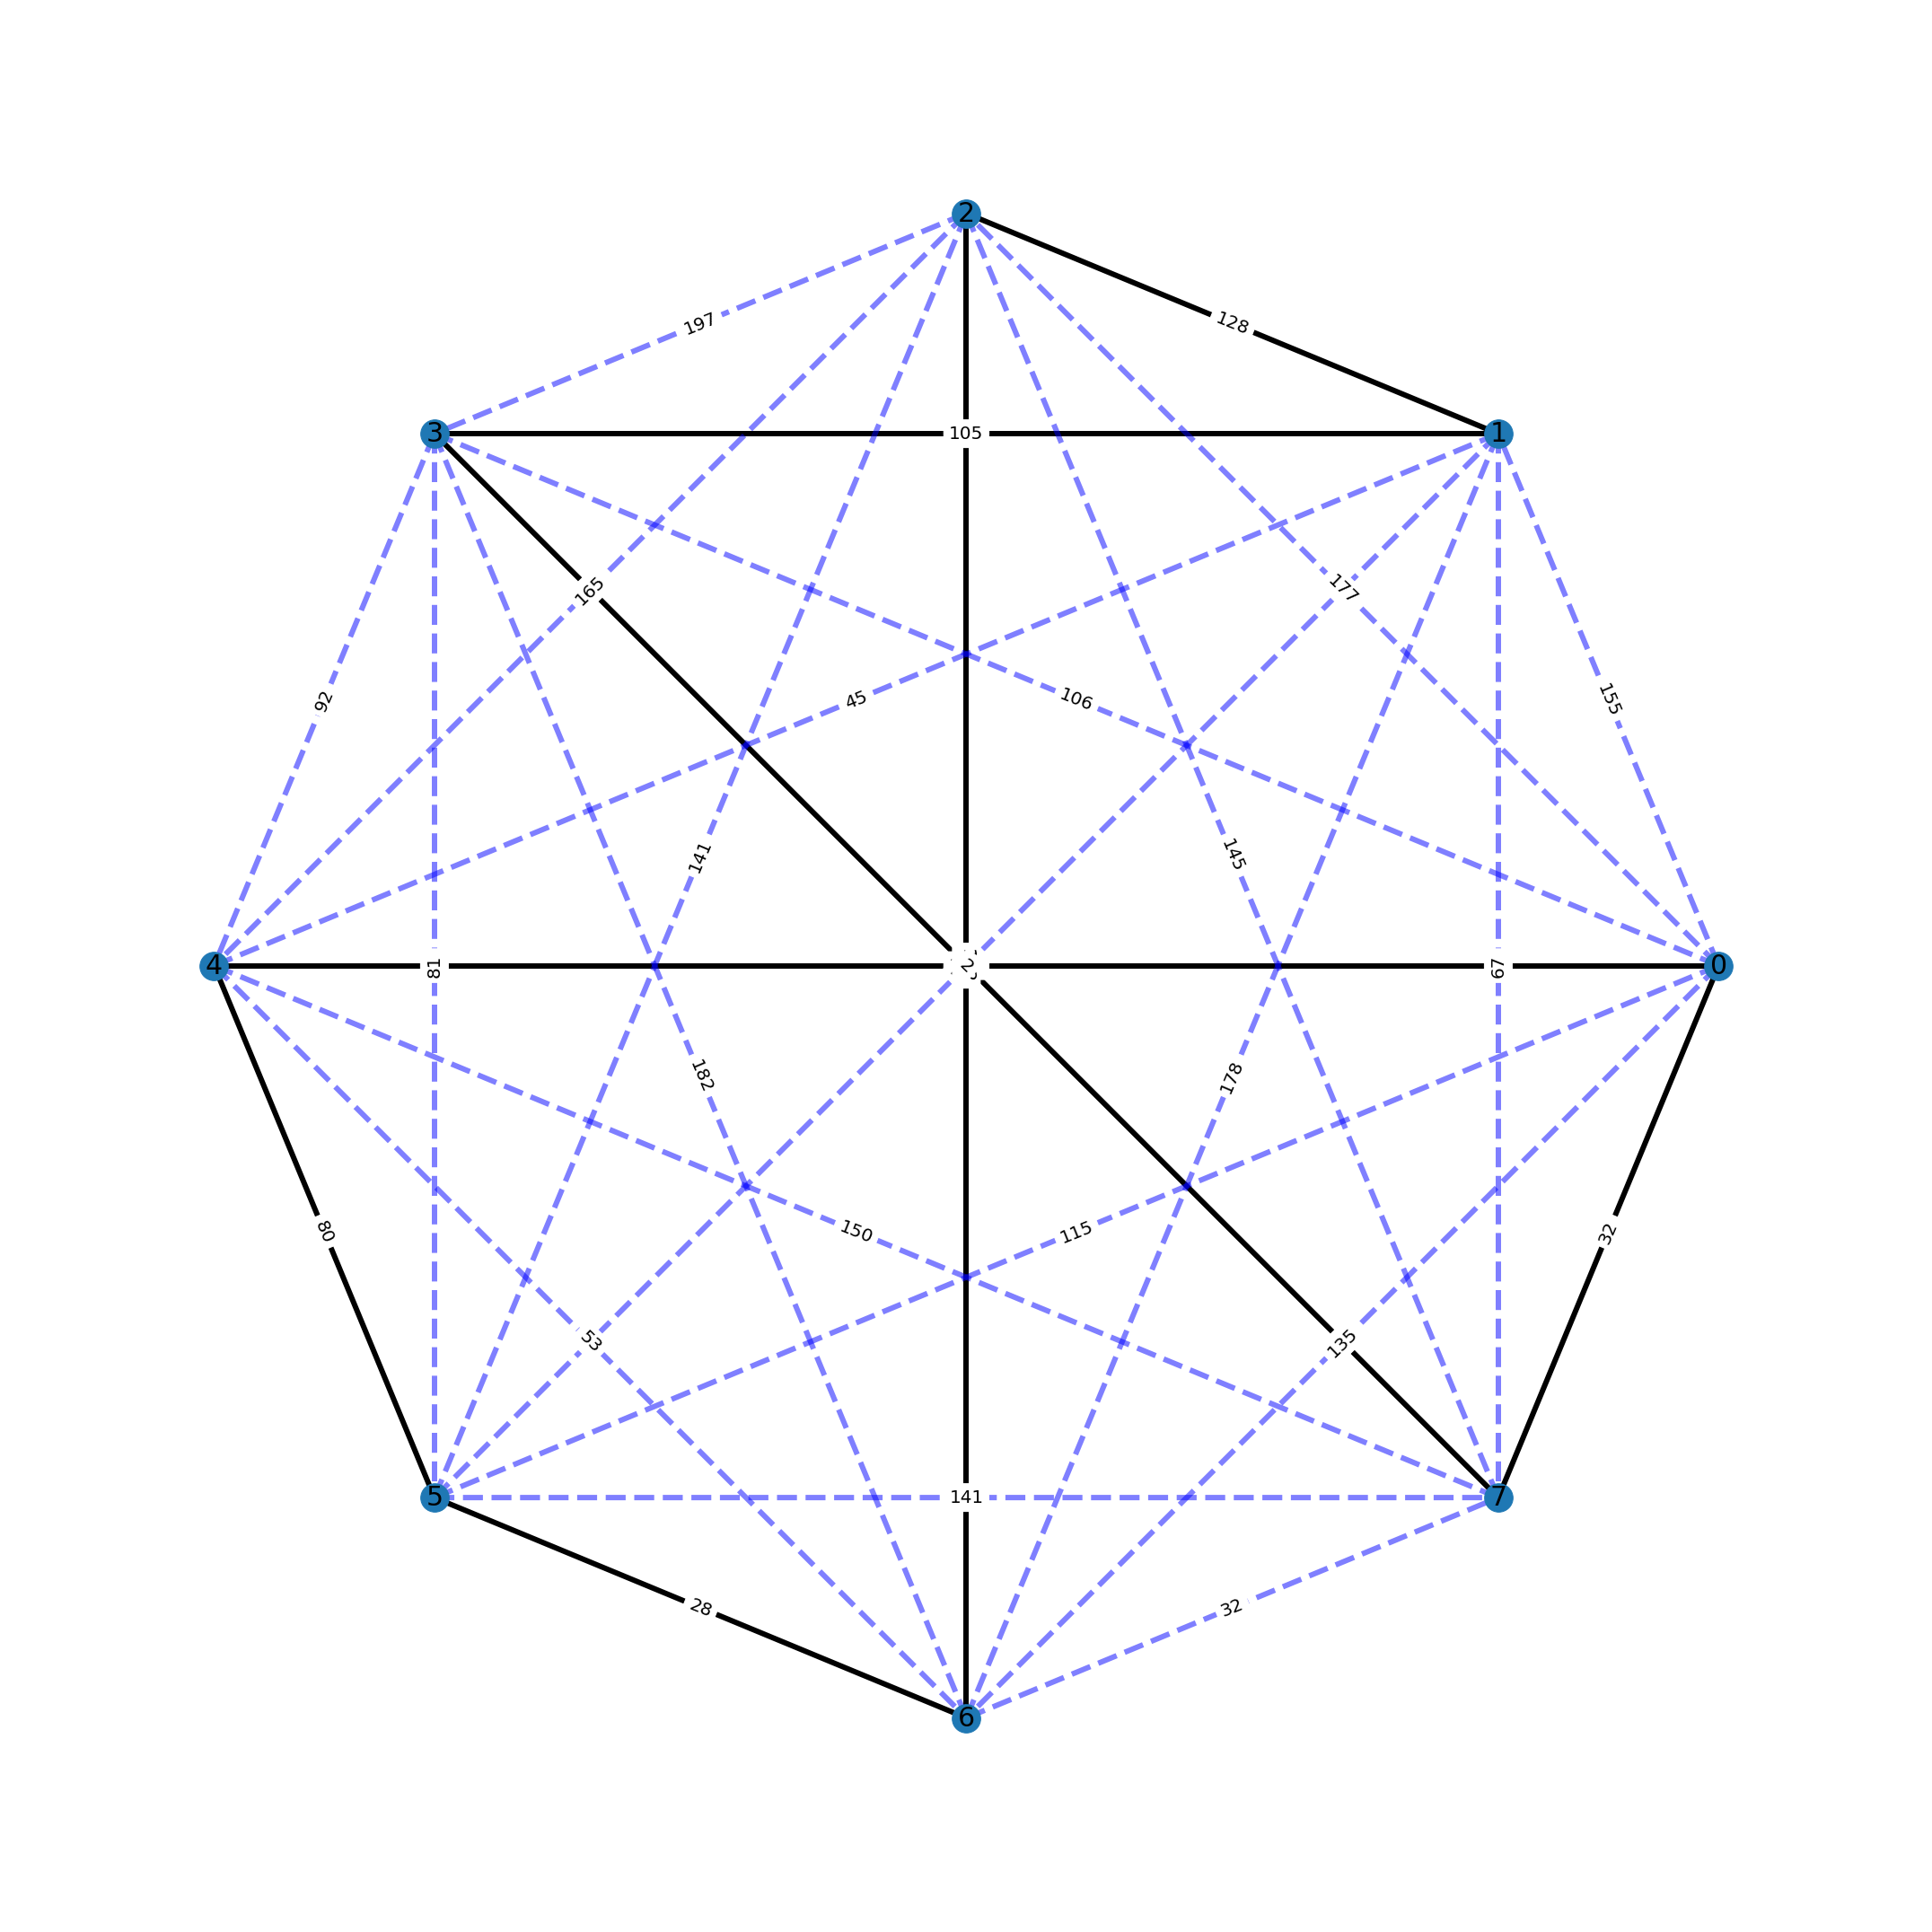

Step: 10 - Cost: 597
Step: 11 - Cost: 597
Step: 12 - Cost: 597


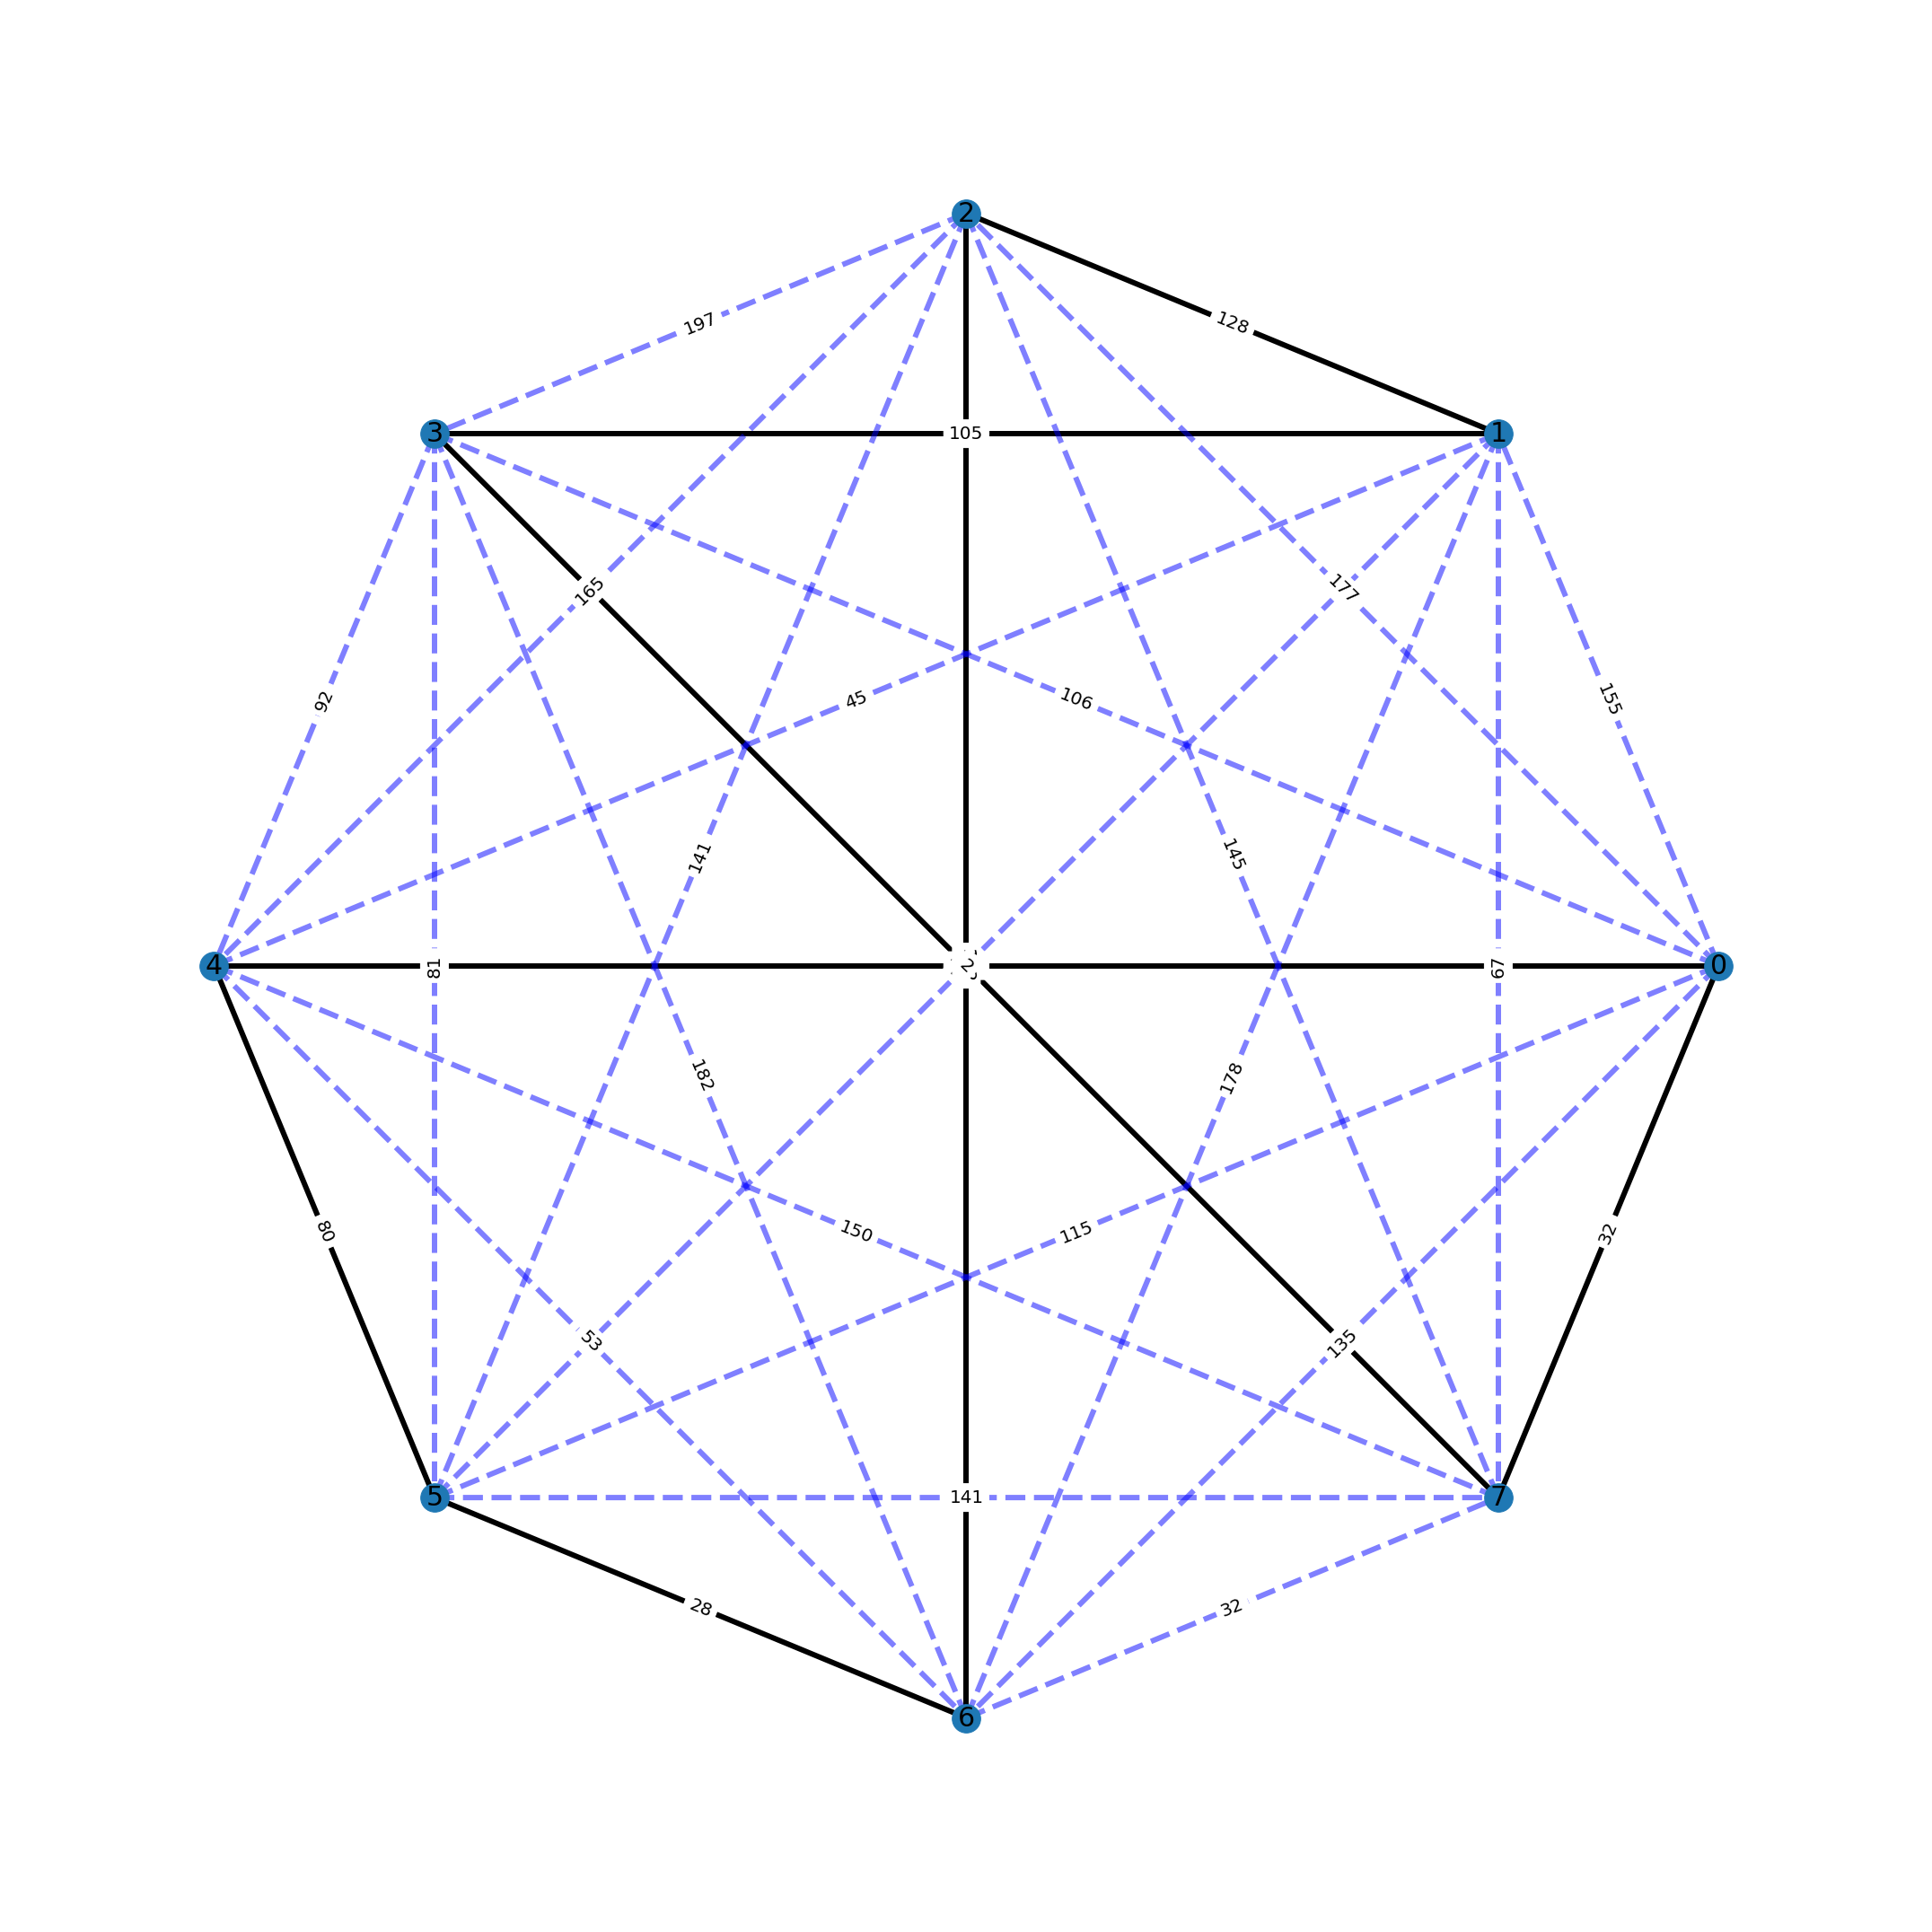

Step: 13 - Cost: 597
Step: 14 - Cost: 597
Step: 15 - Cost: 597


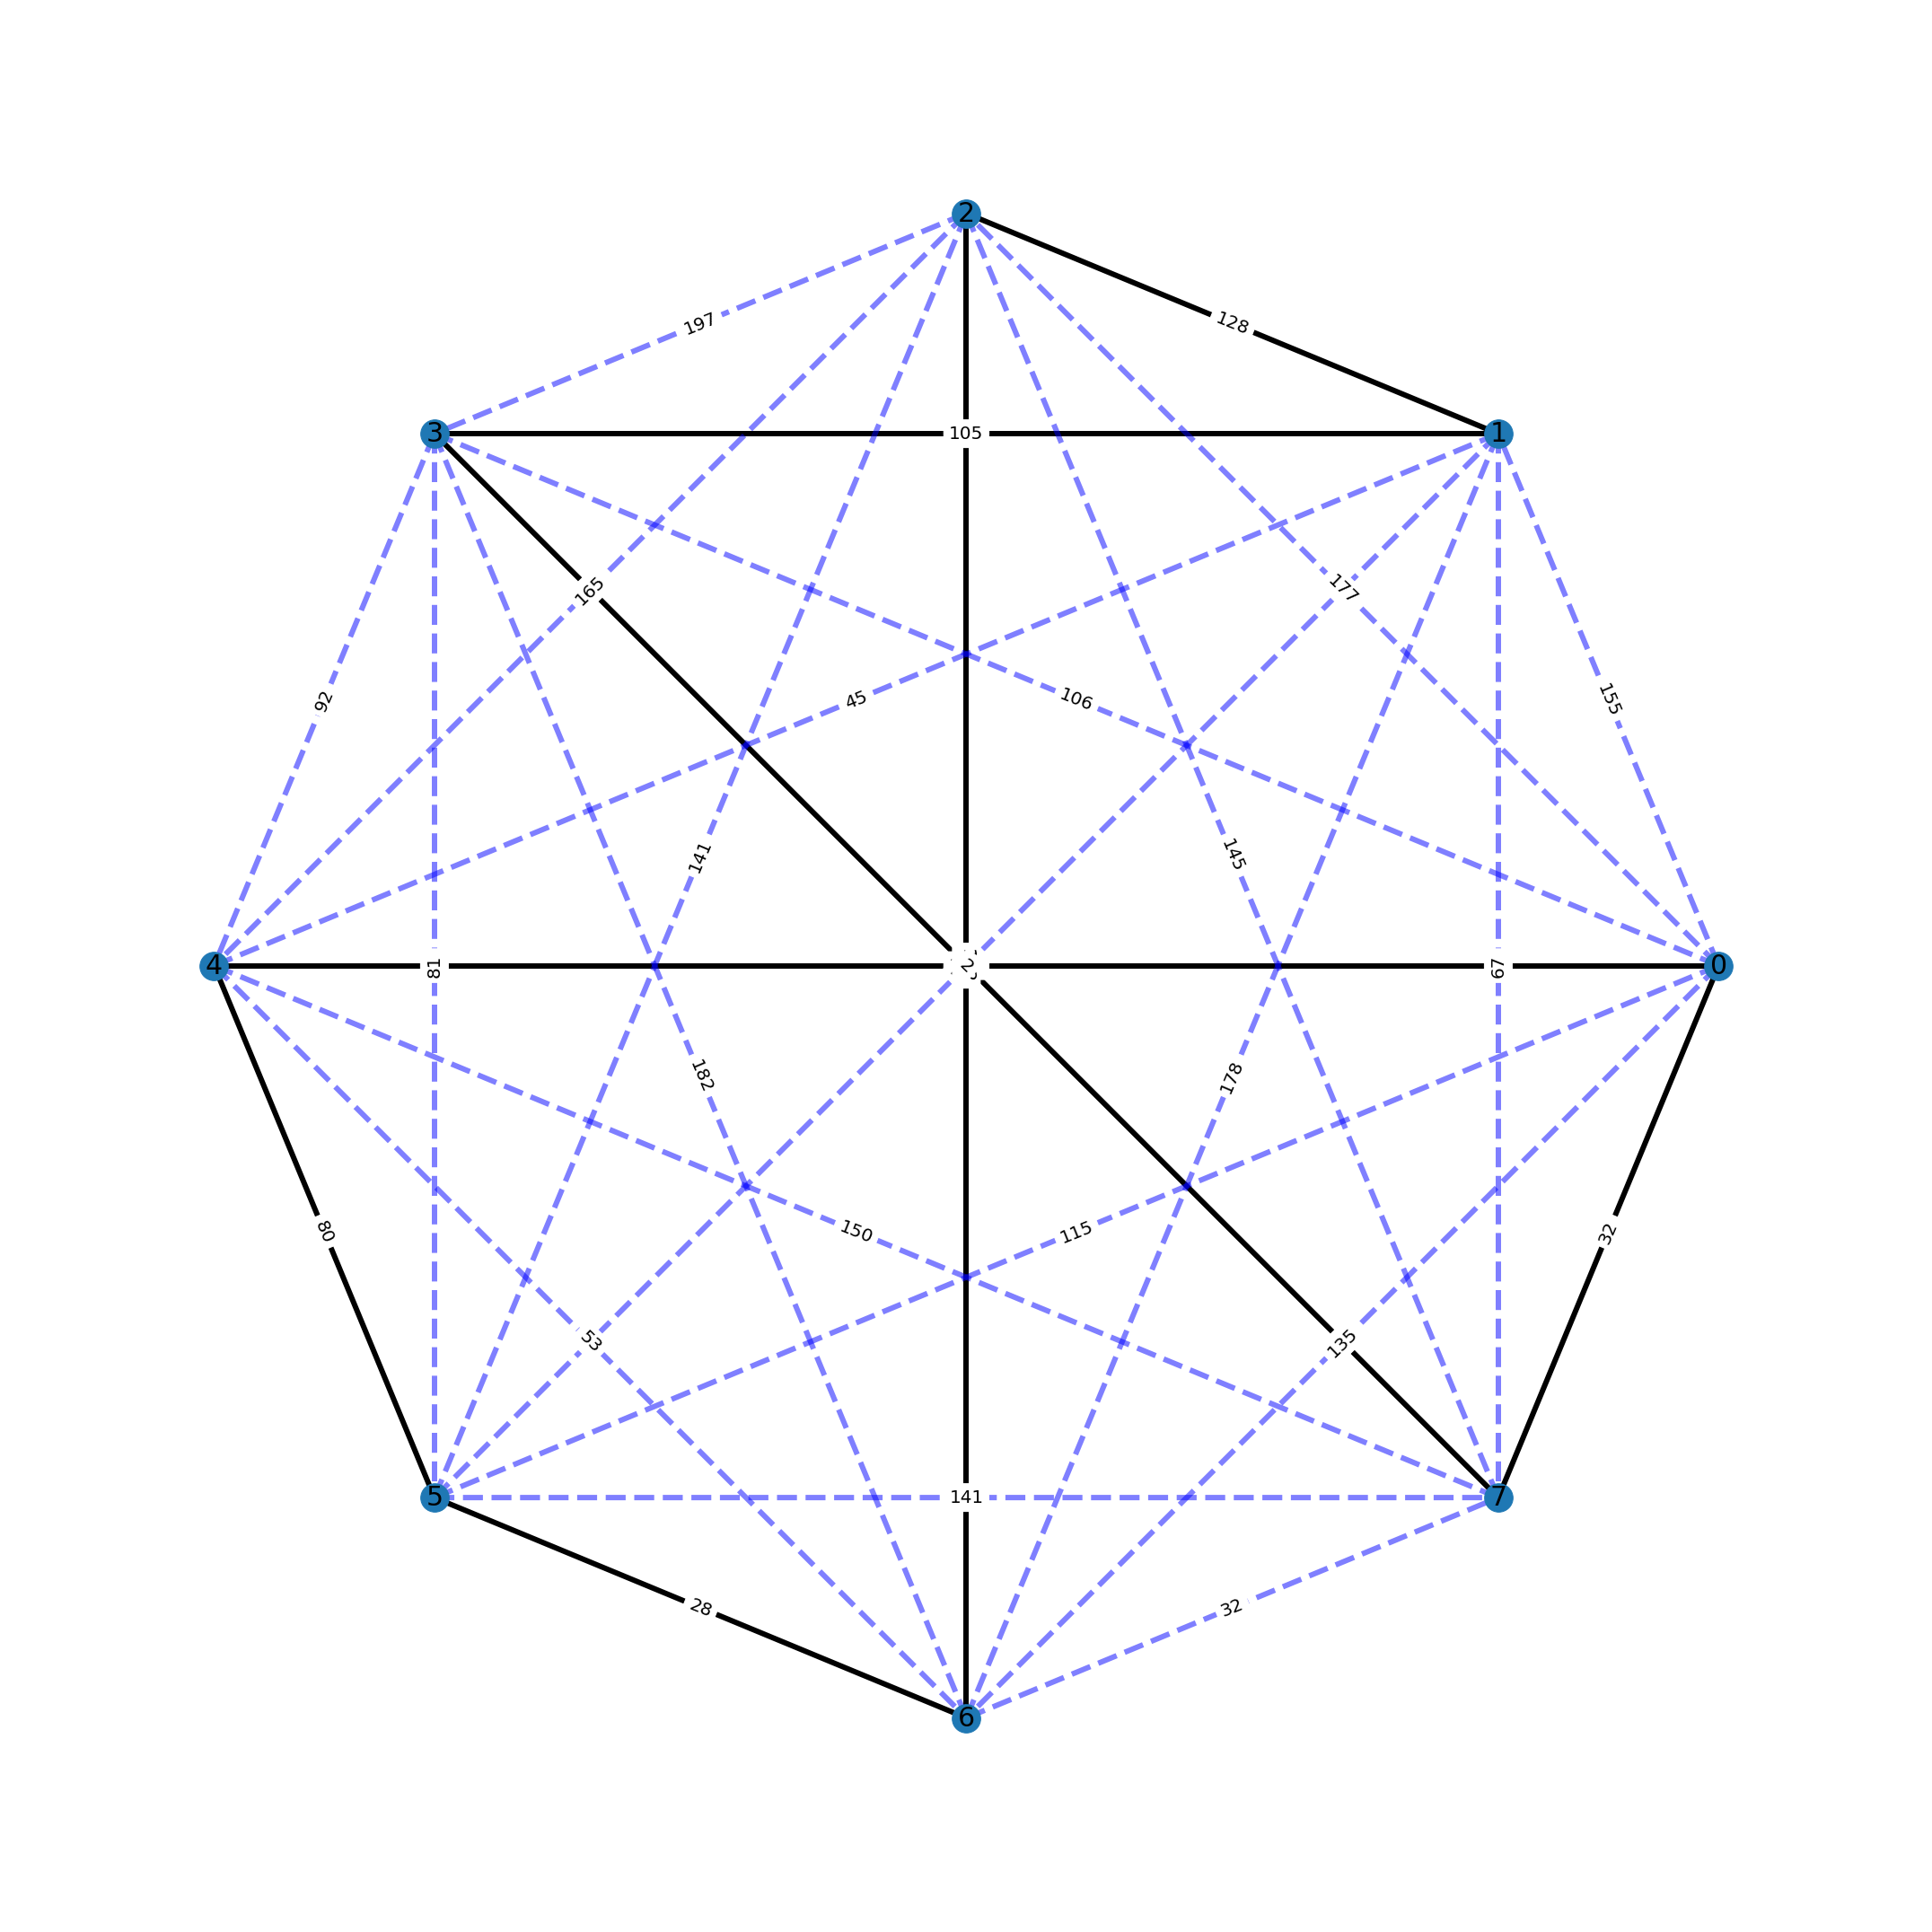

Step: 16 - Cost: 583
Step: 17 - Cost: 583
Step: 18 - Cost: 583


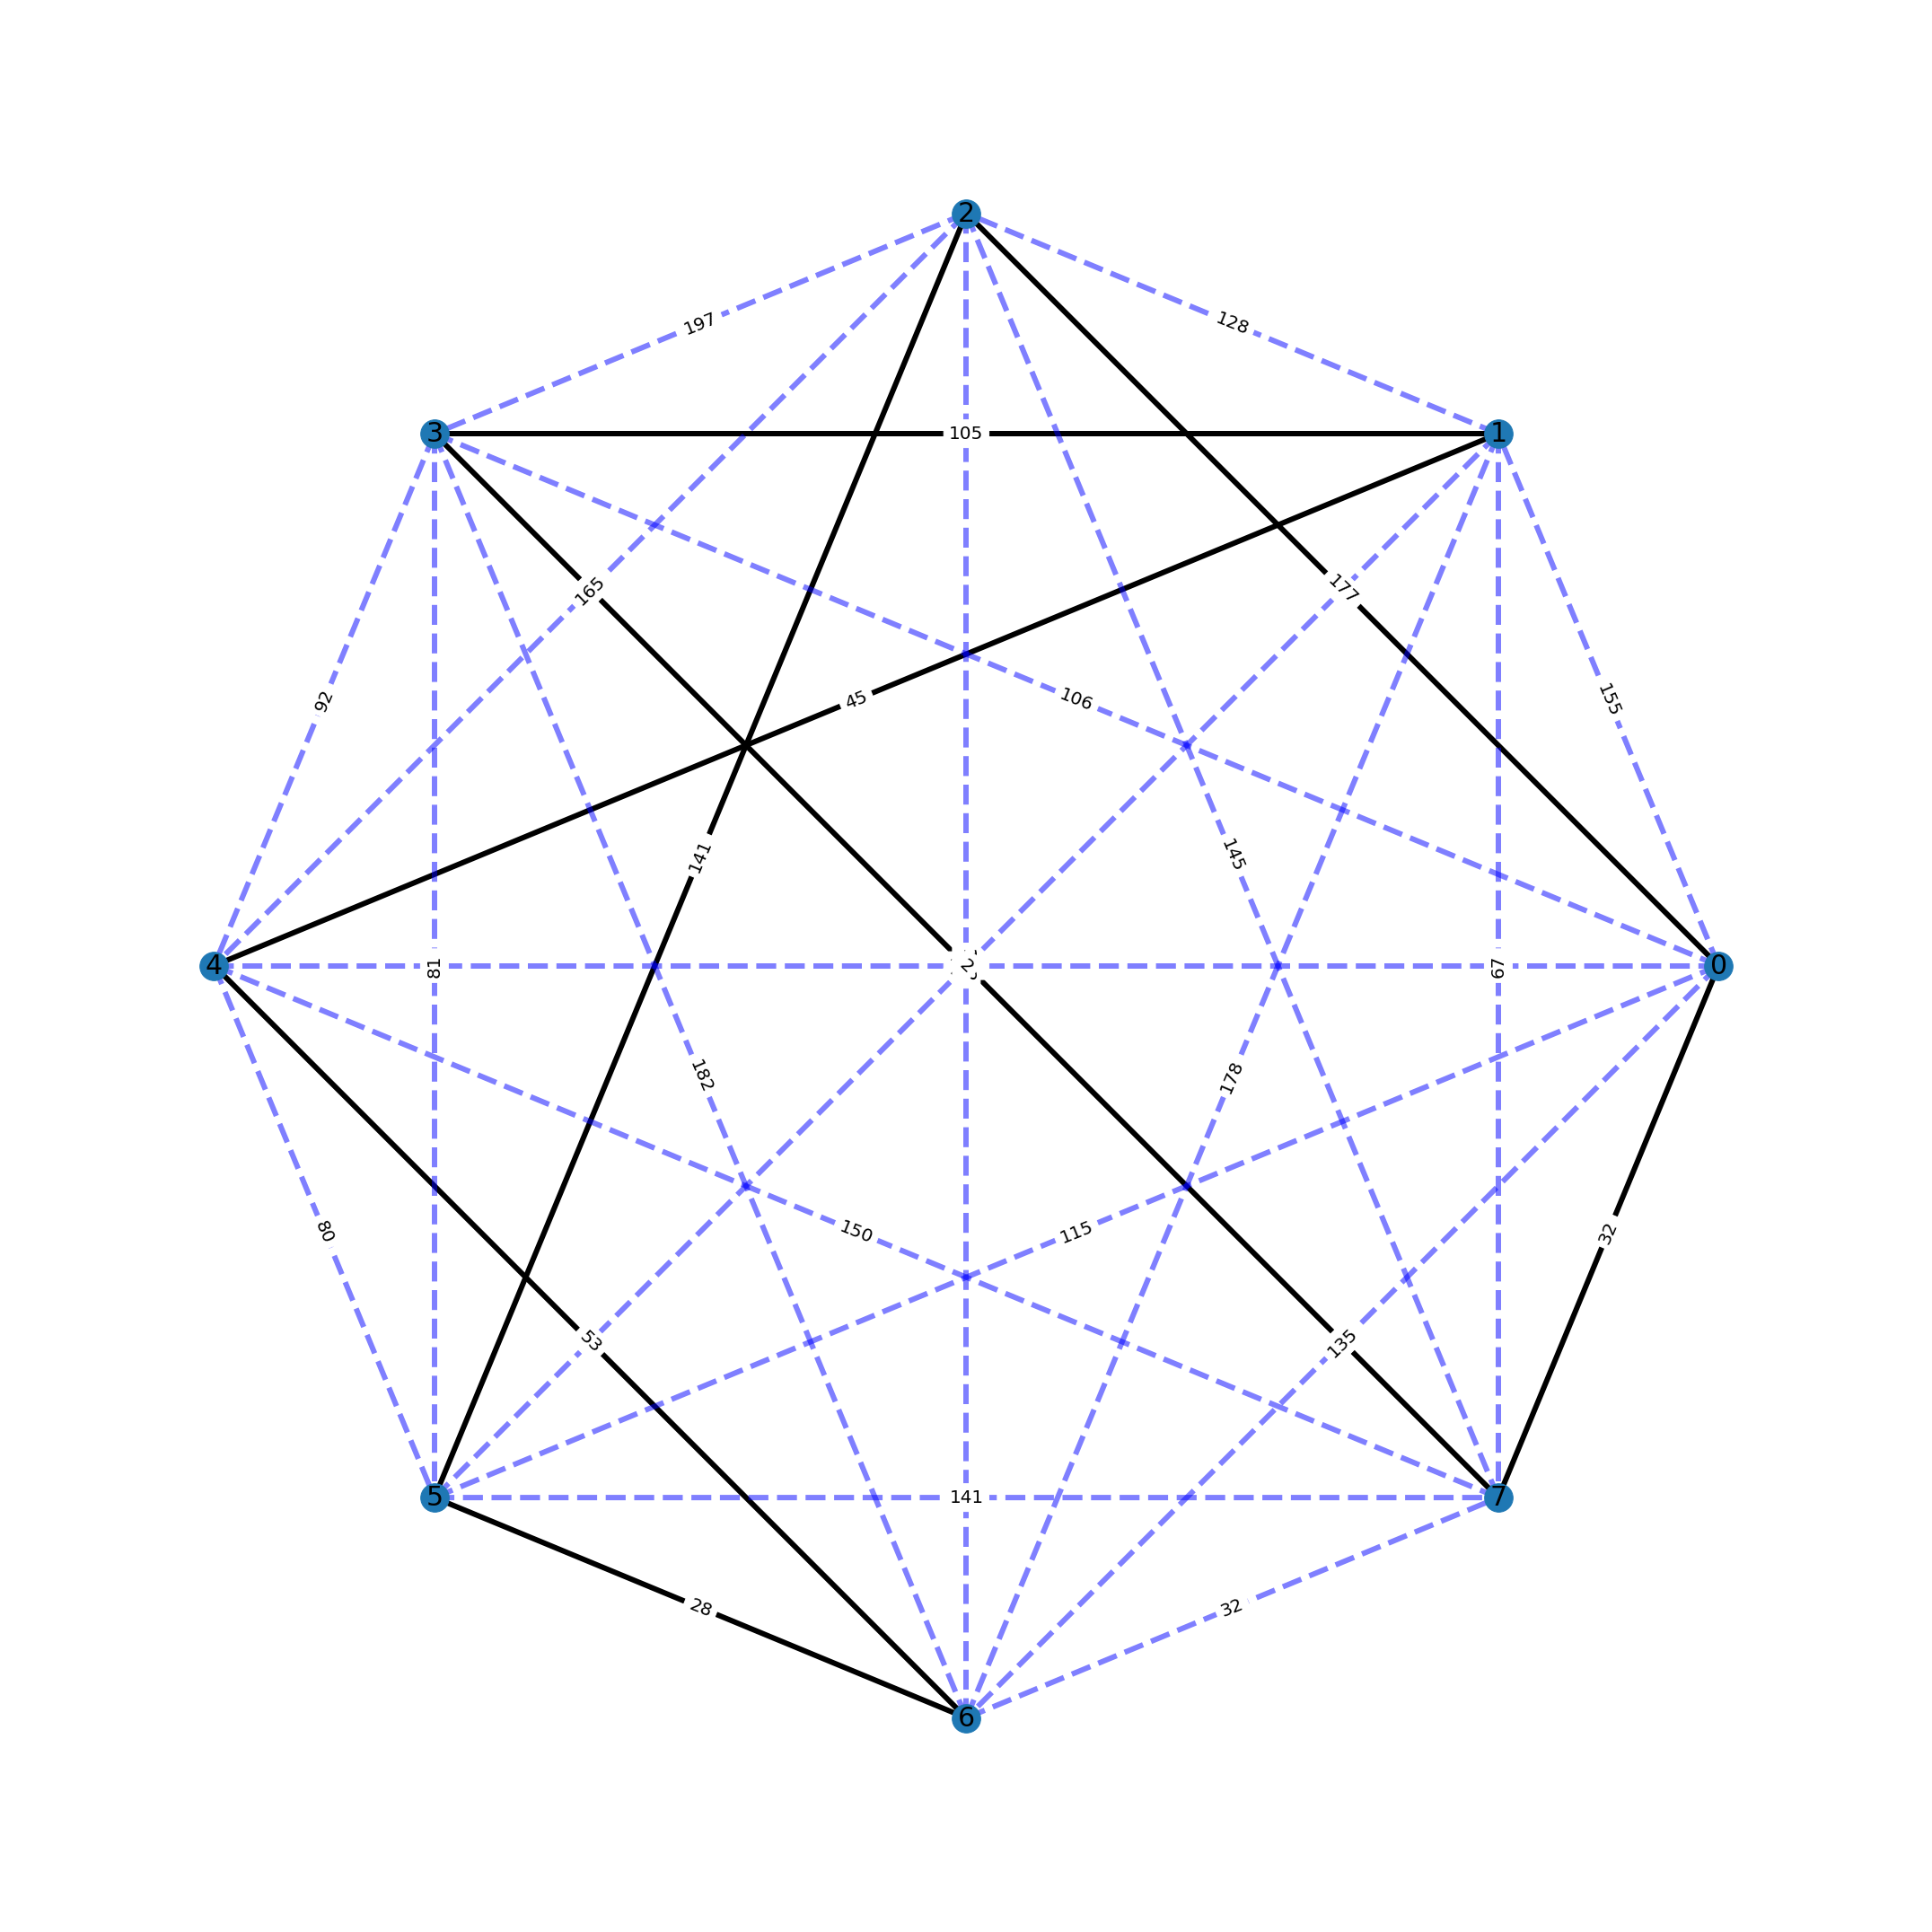

Step: 19 - Cost: 583
Step: 20 - Cost: 583
Step: 21 - Cost: 581


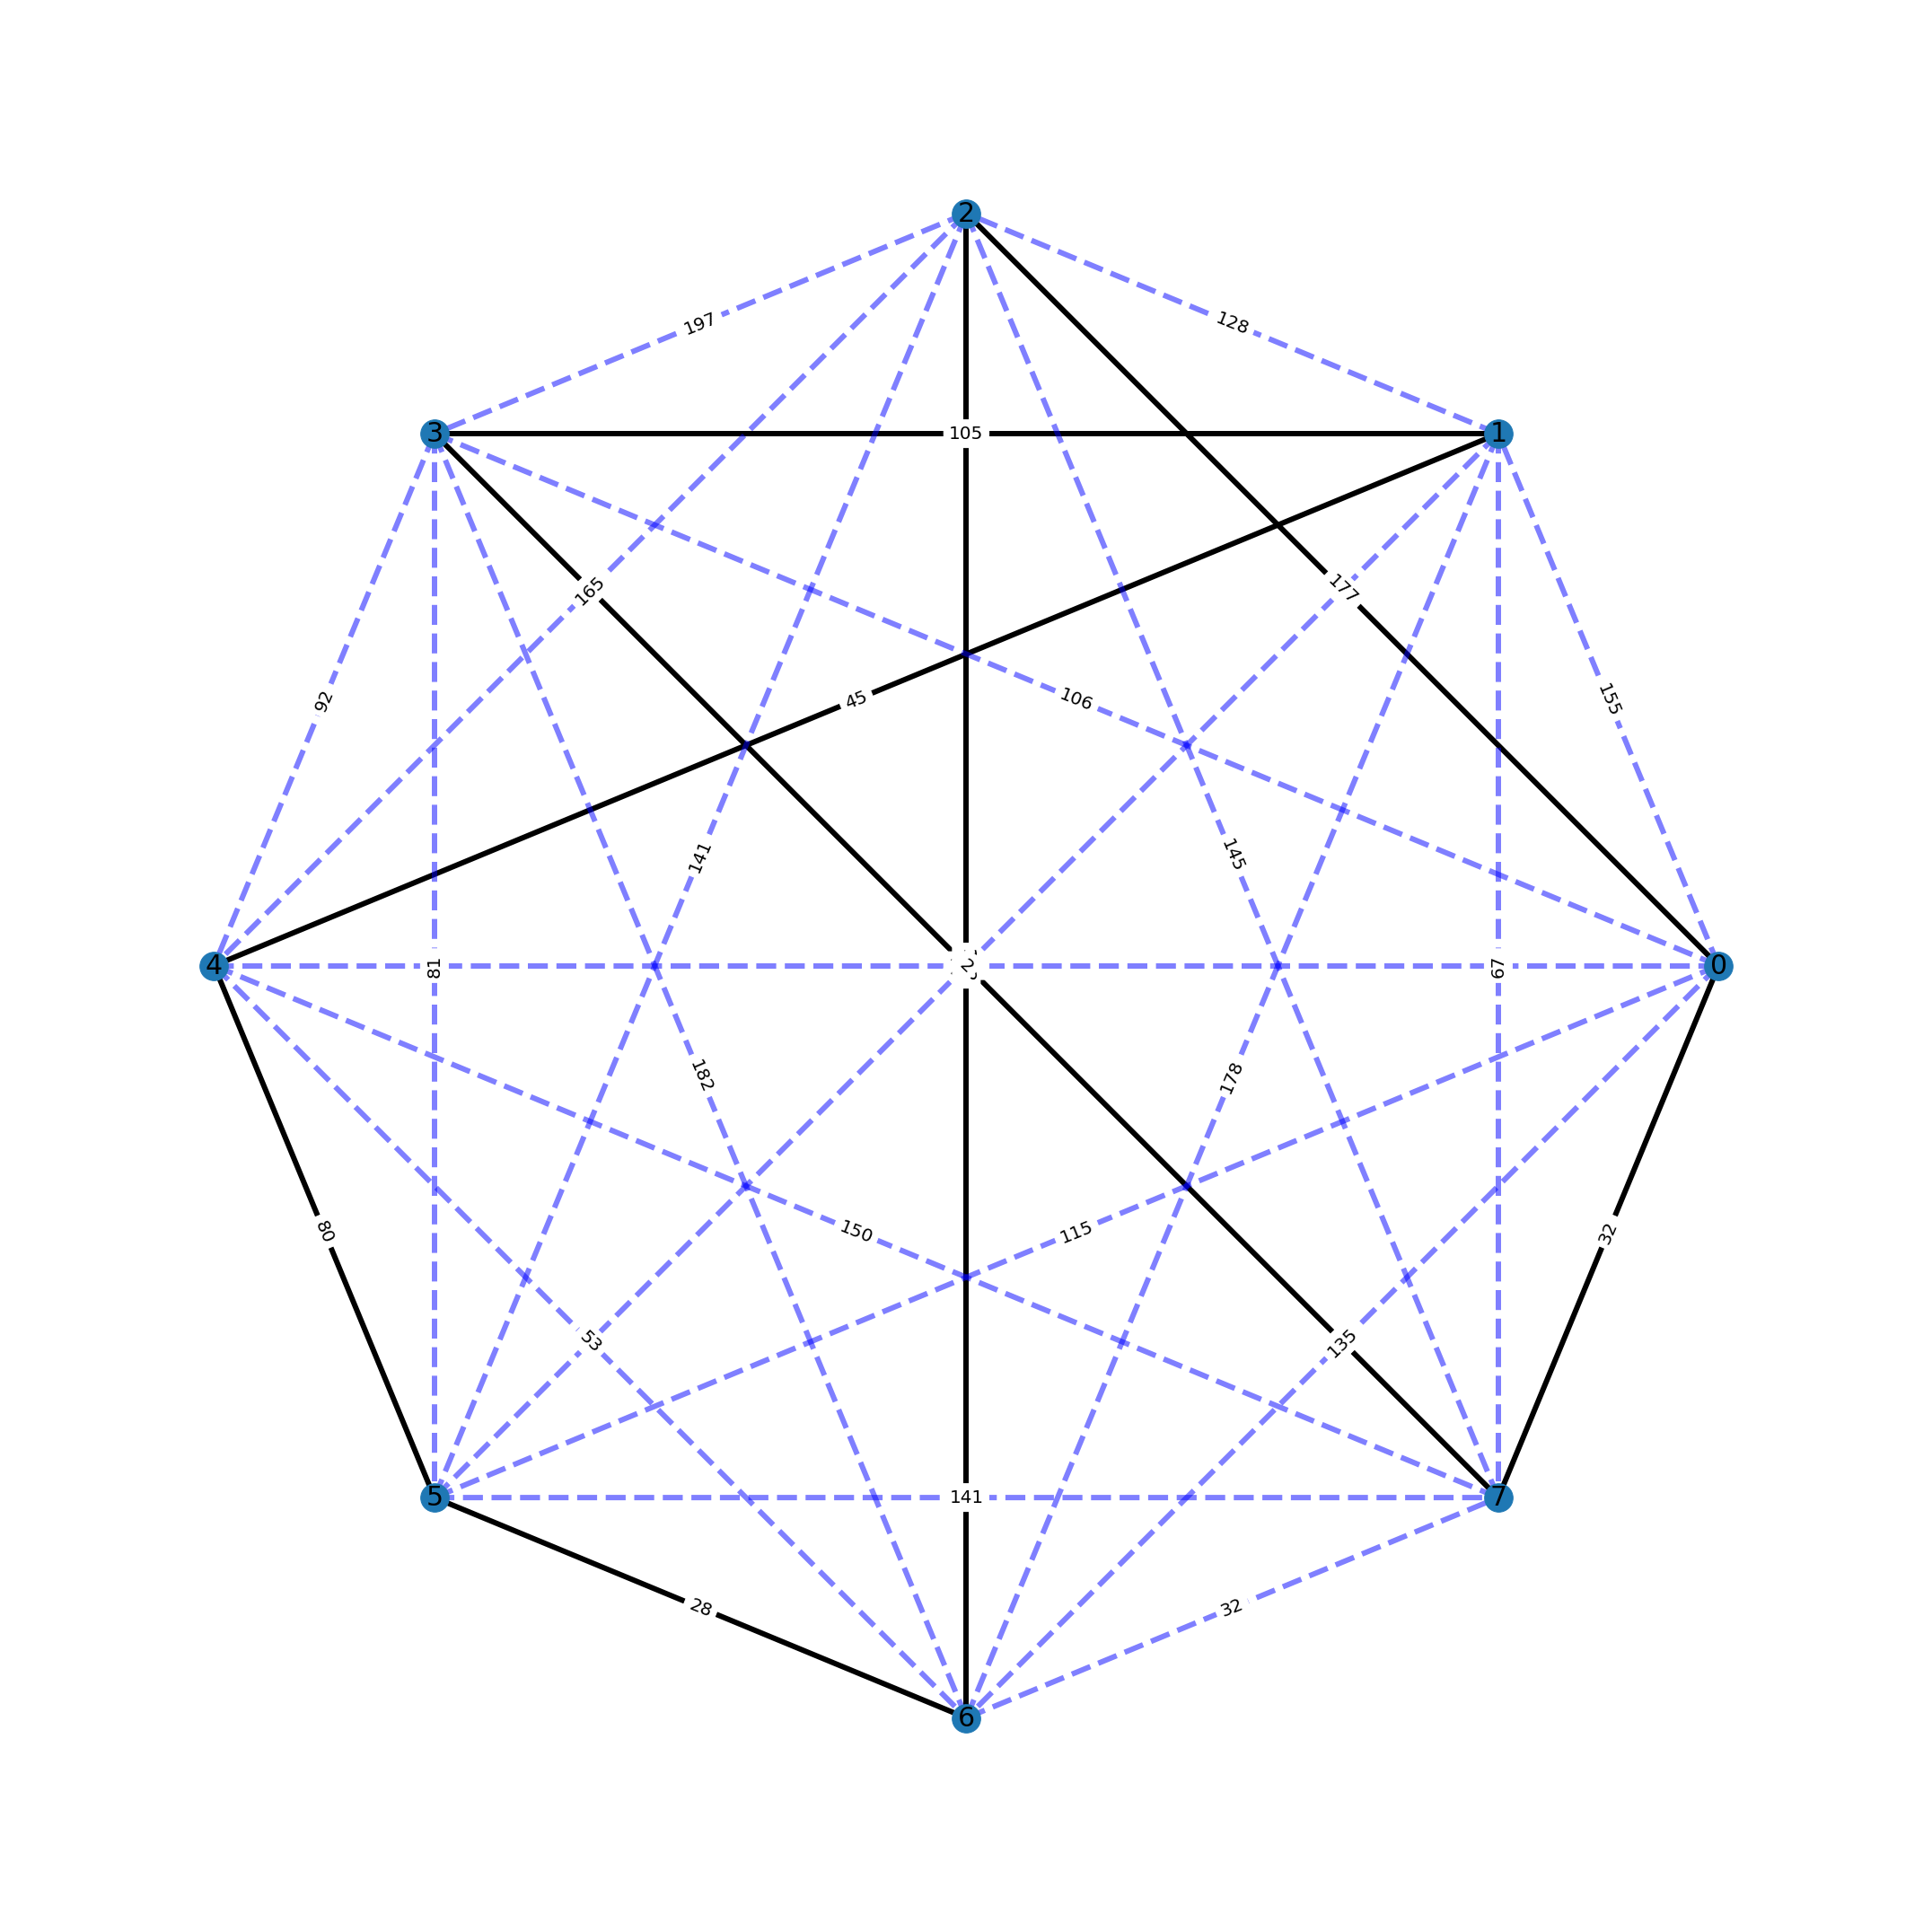

Step: 22 - Cost: 581
Step: 23 - Cost: 581
Step: 24 - Cost: 581


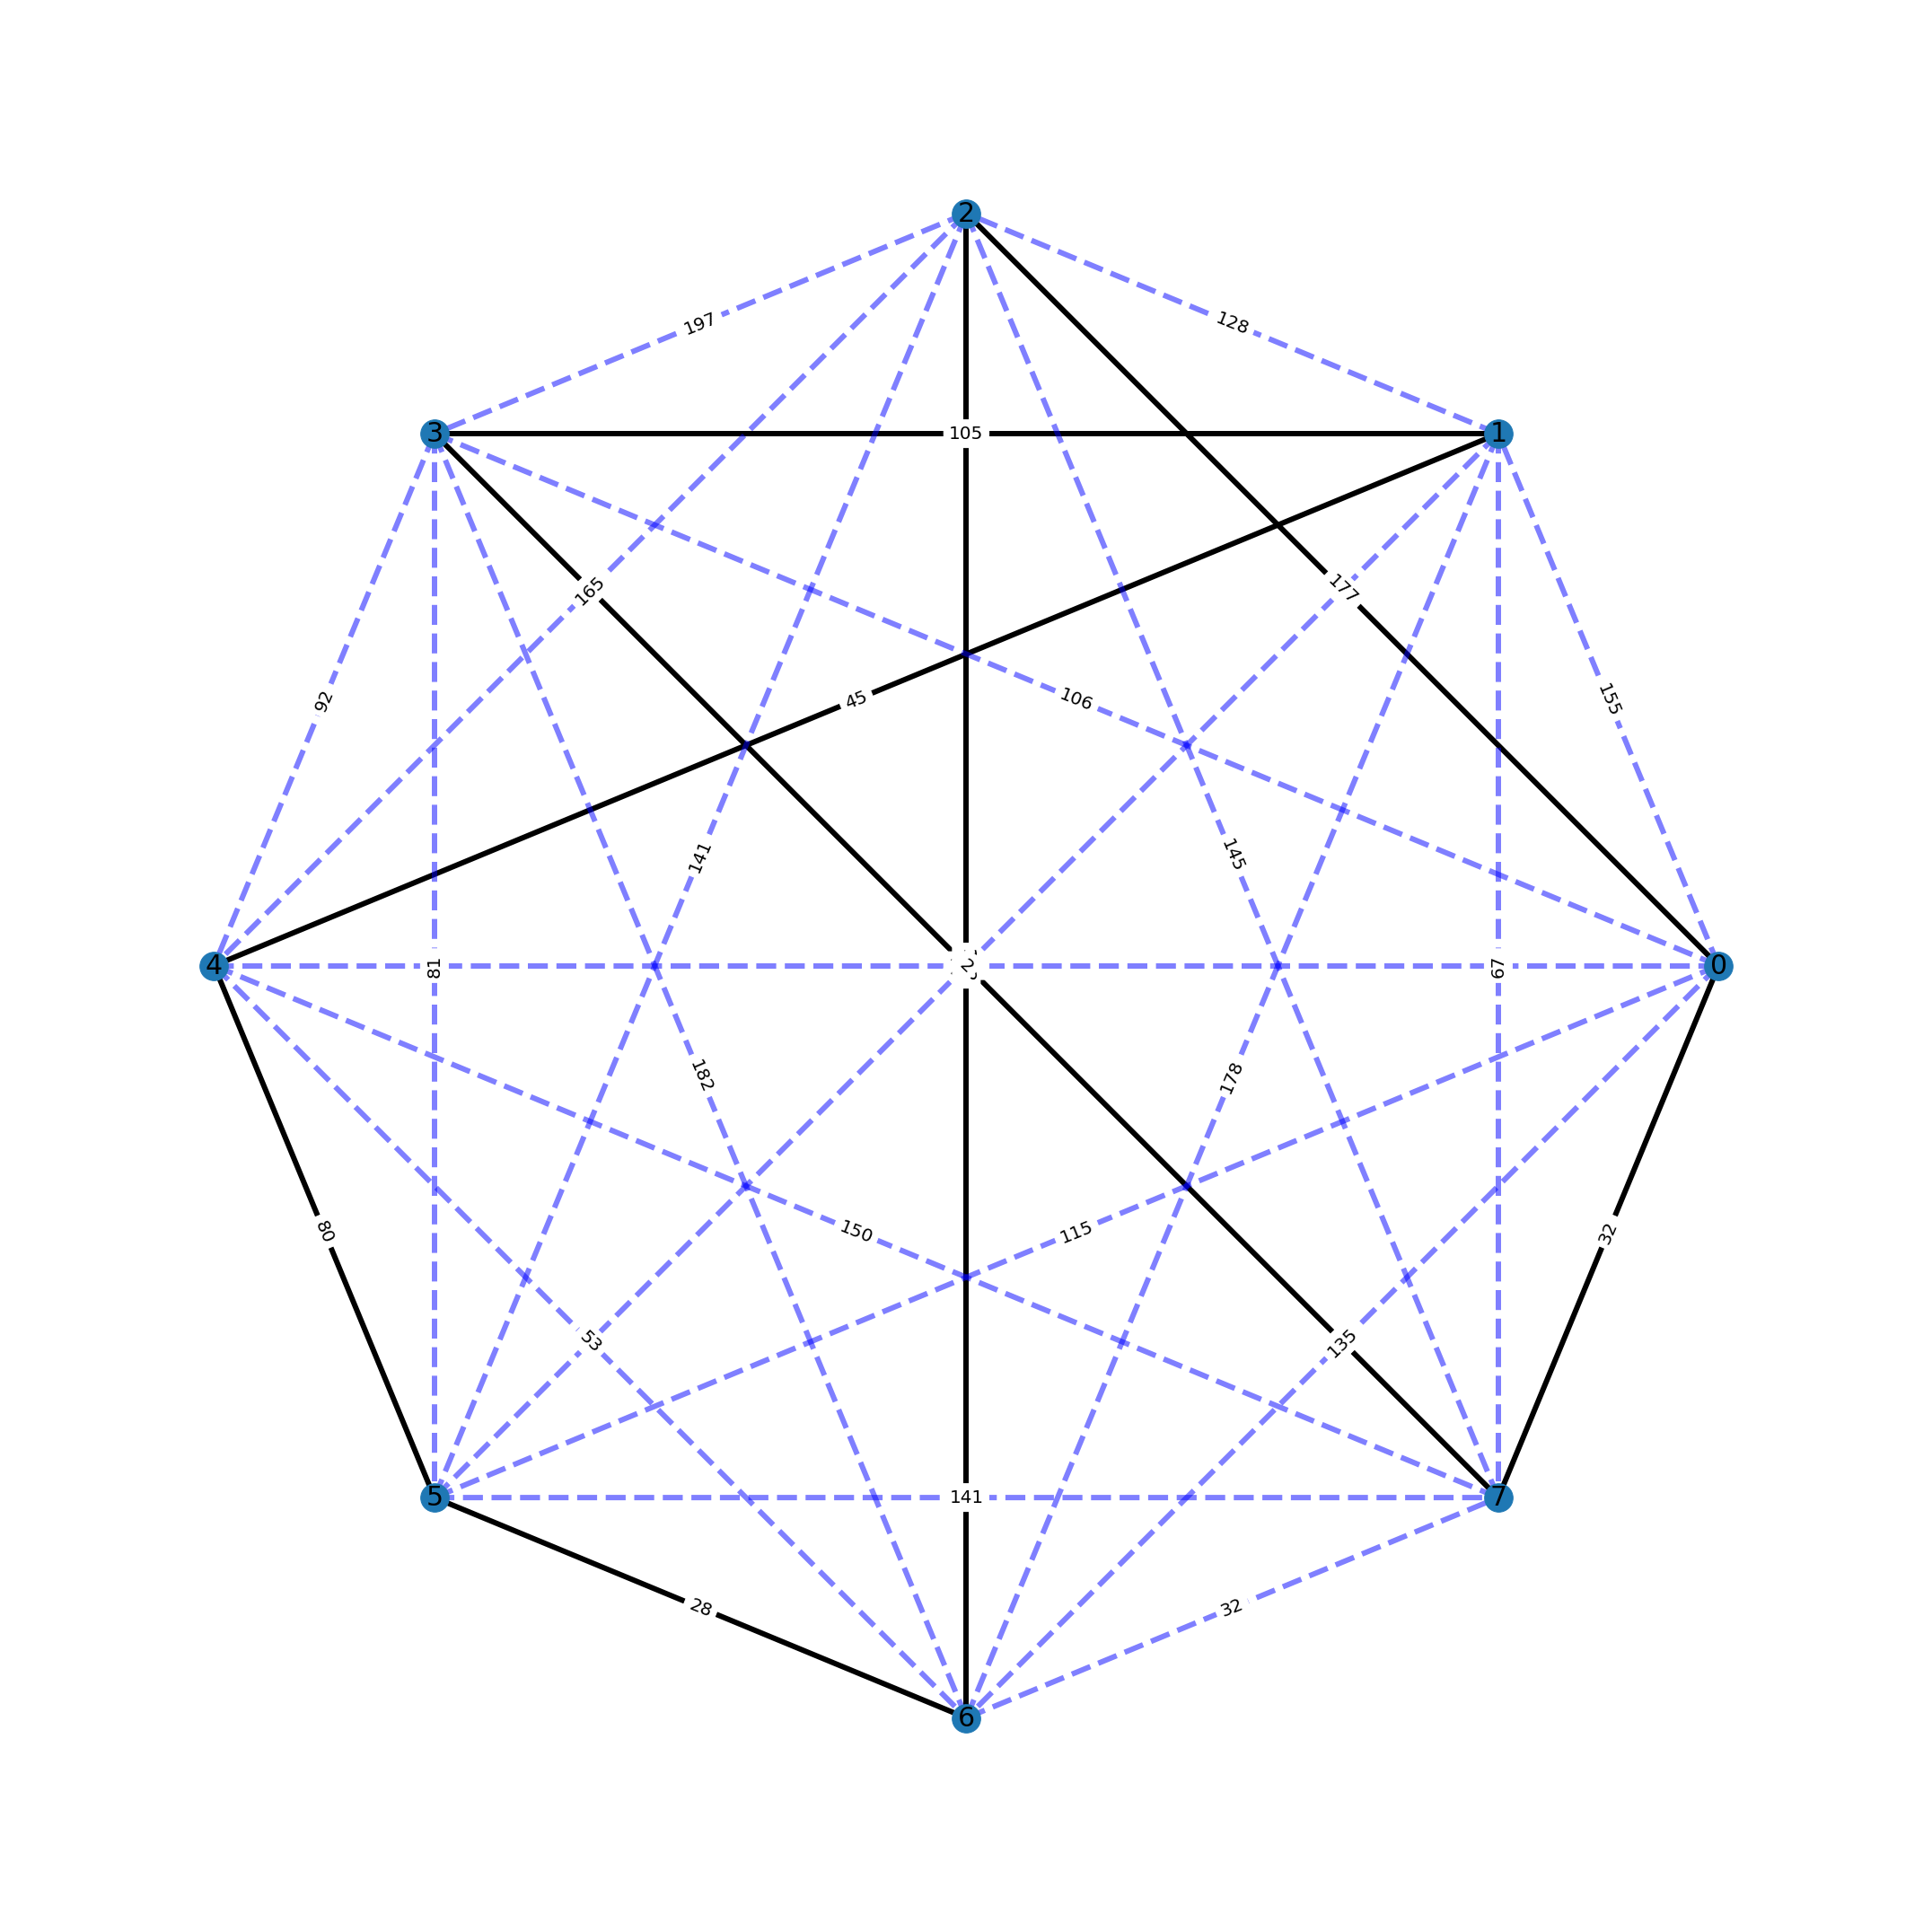

Step: 25 - Cost: 581
Step: 26 - Cost: 581
Step: 27 - Cost: 581


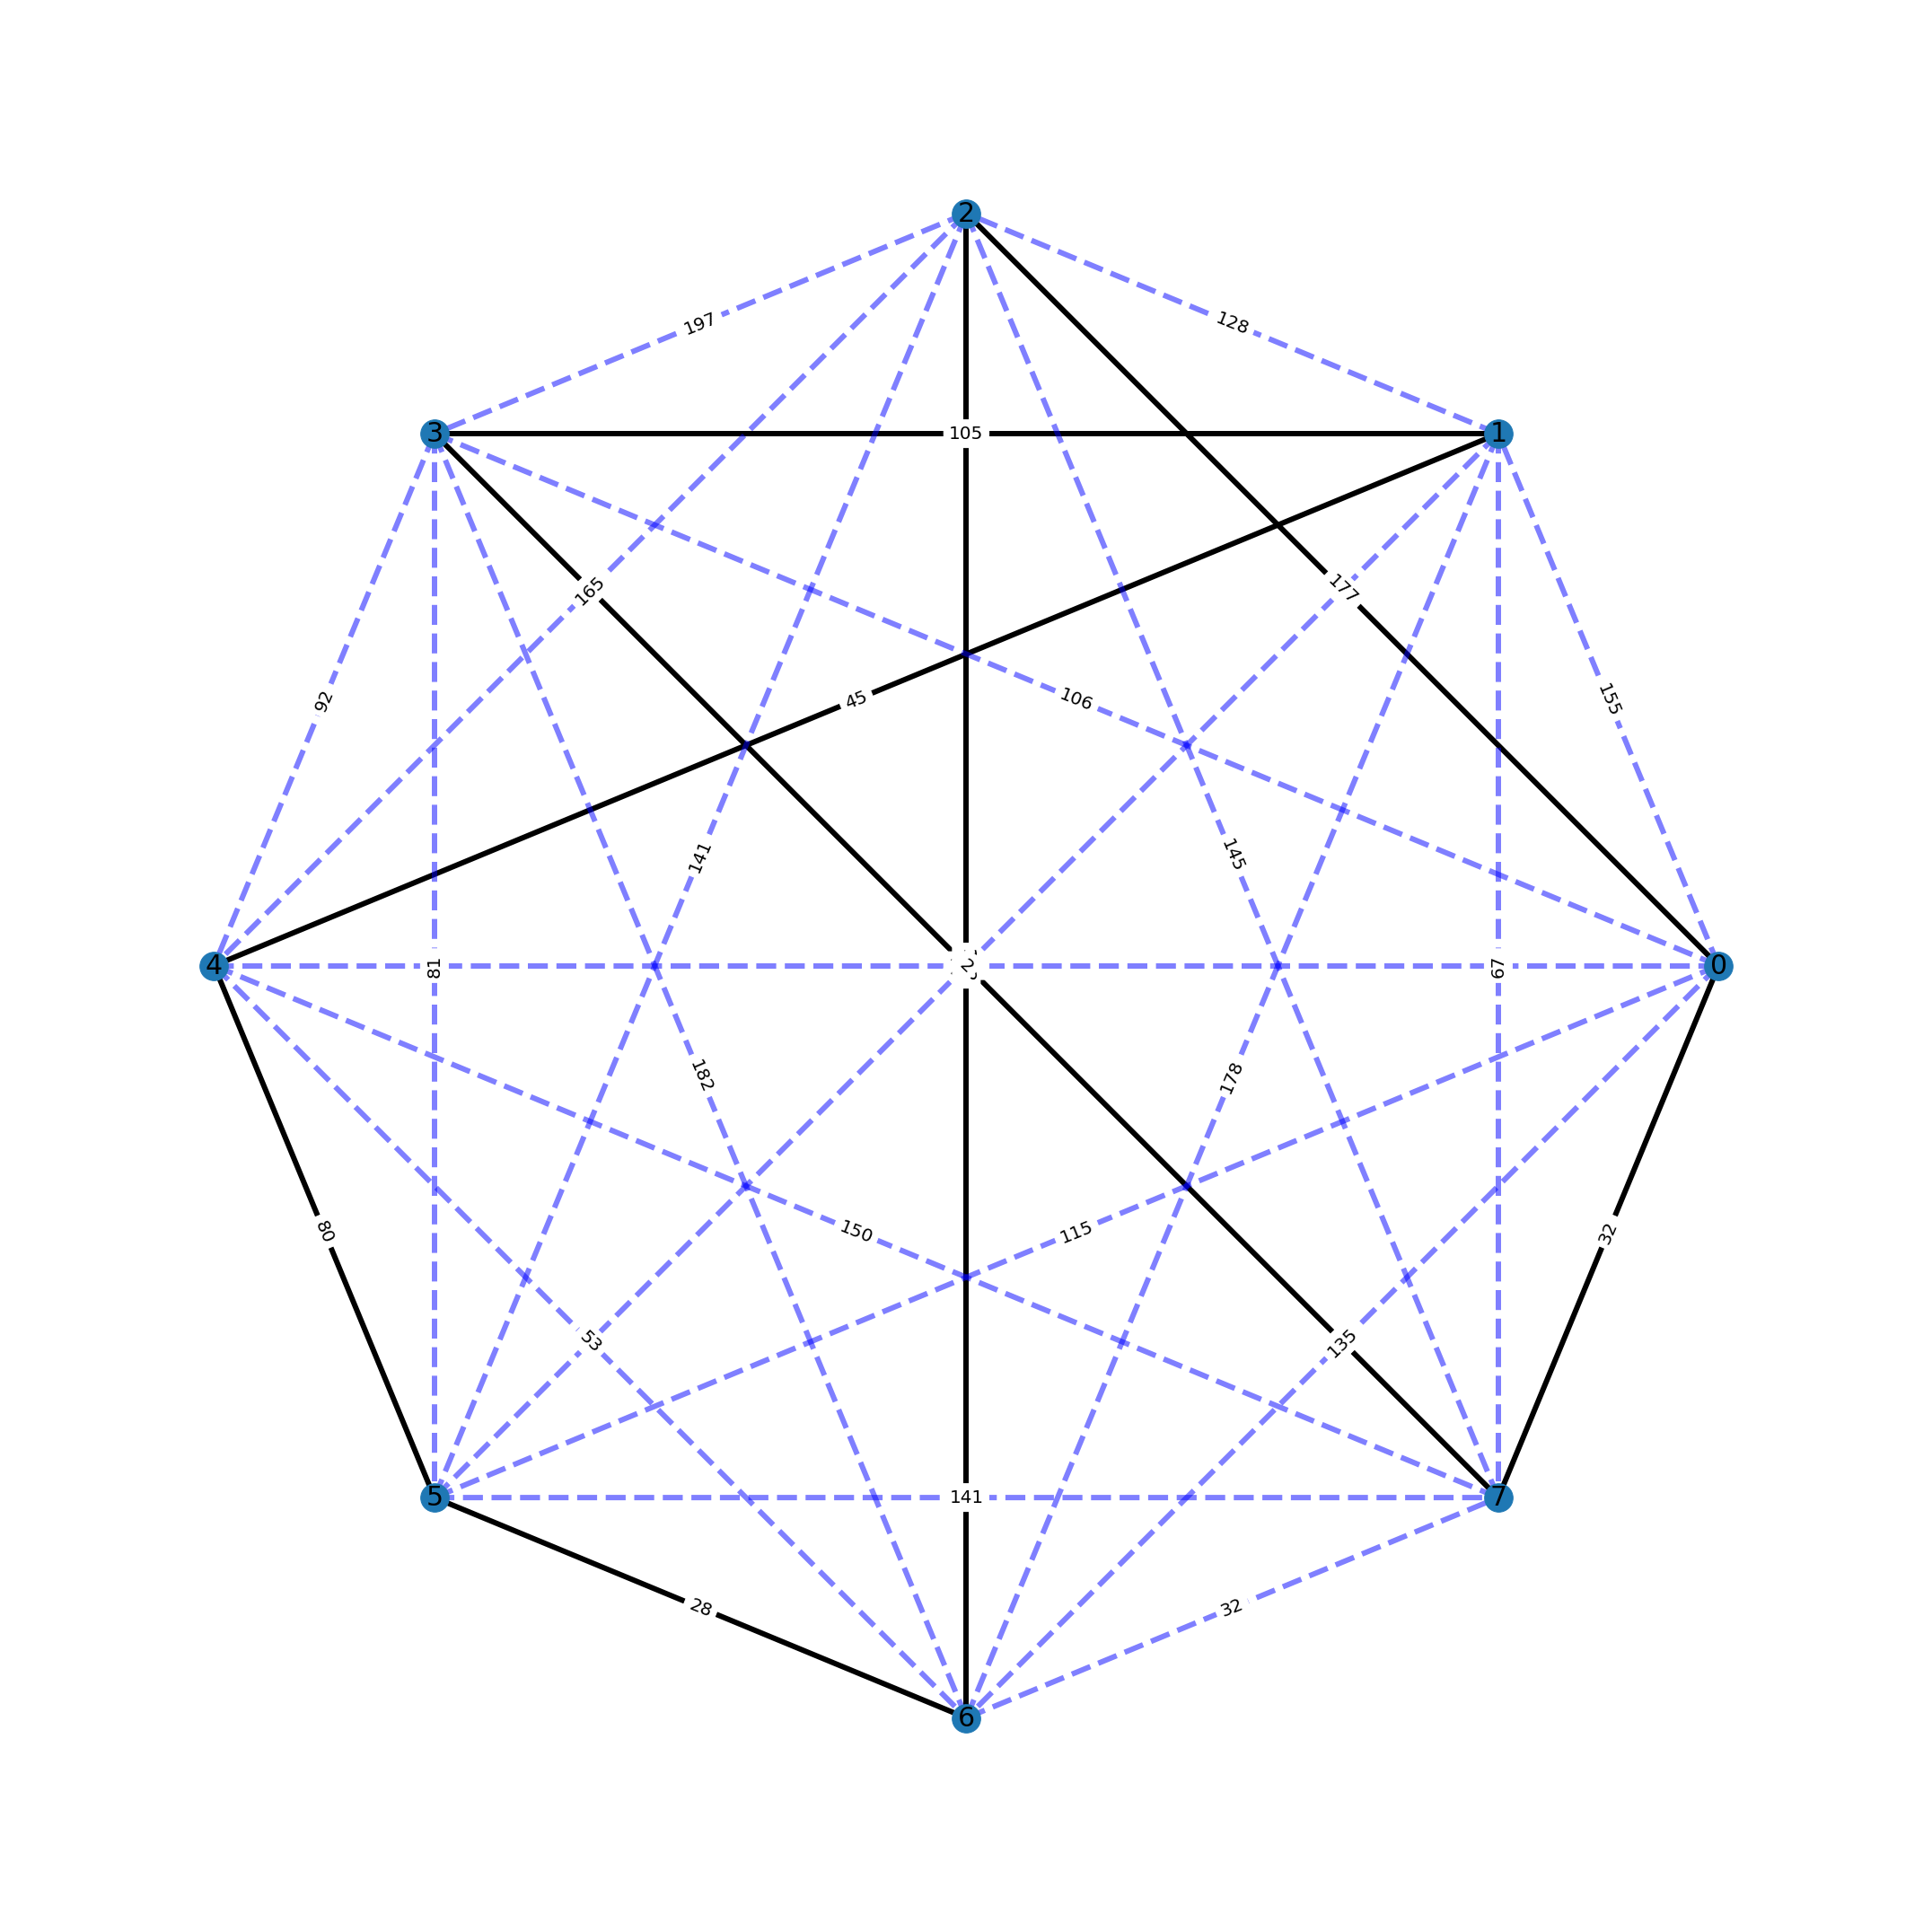

Step: 28 - Cost: 581
Step: 29 - Cost: 581
Step: 30 - Cost: 581


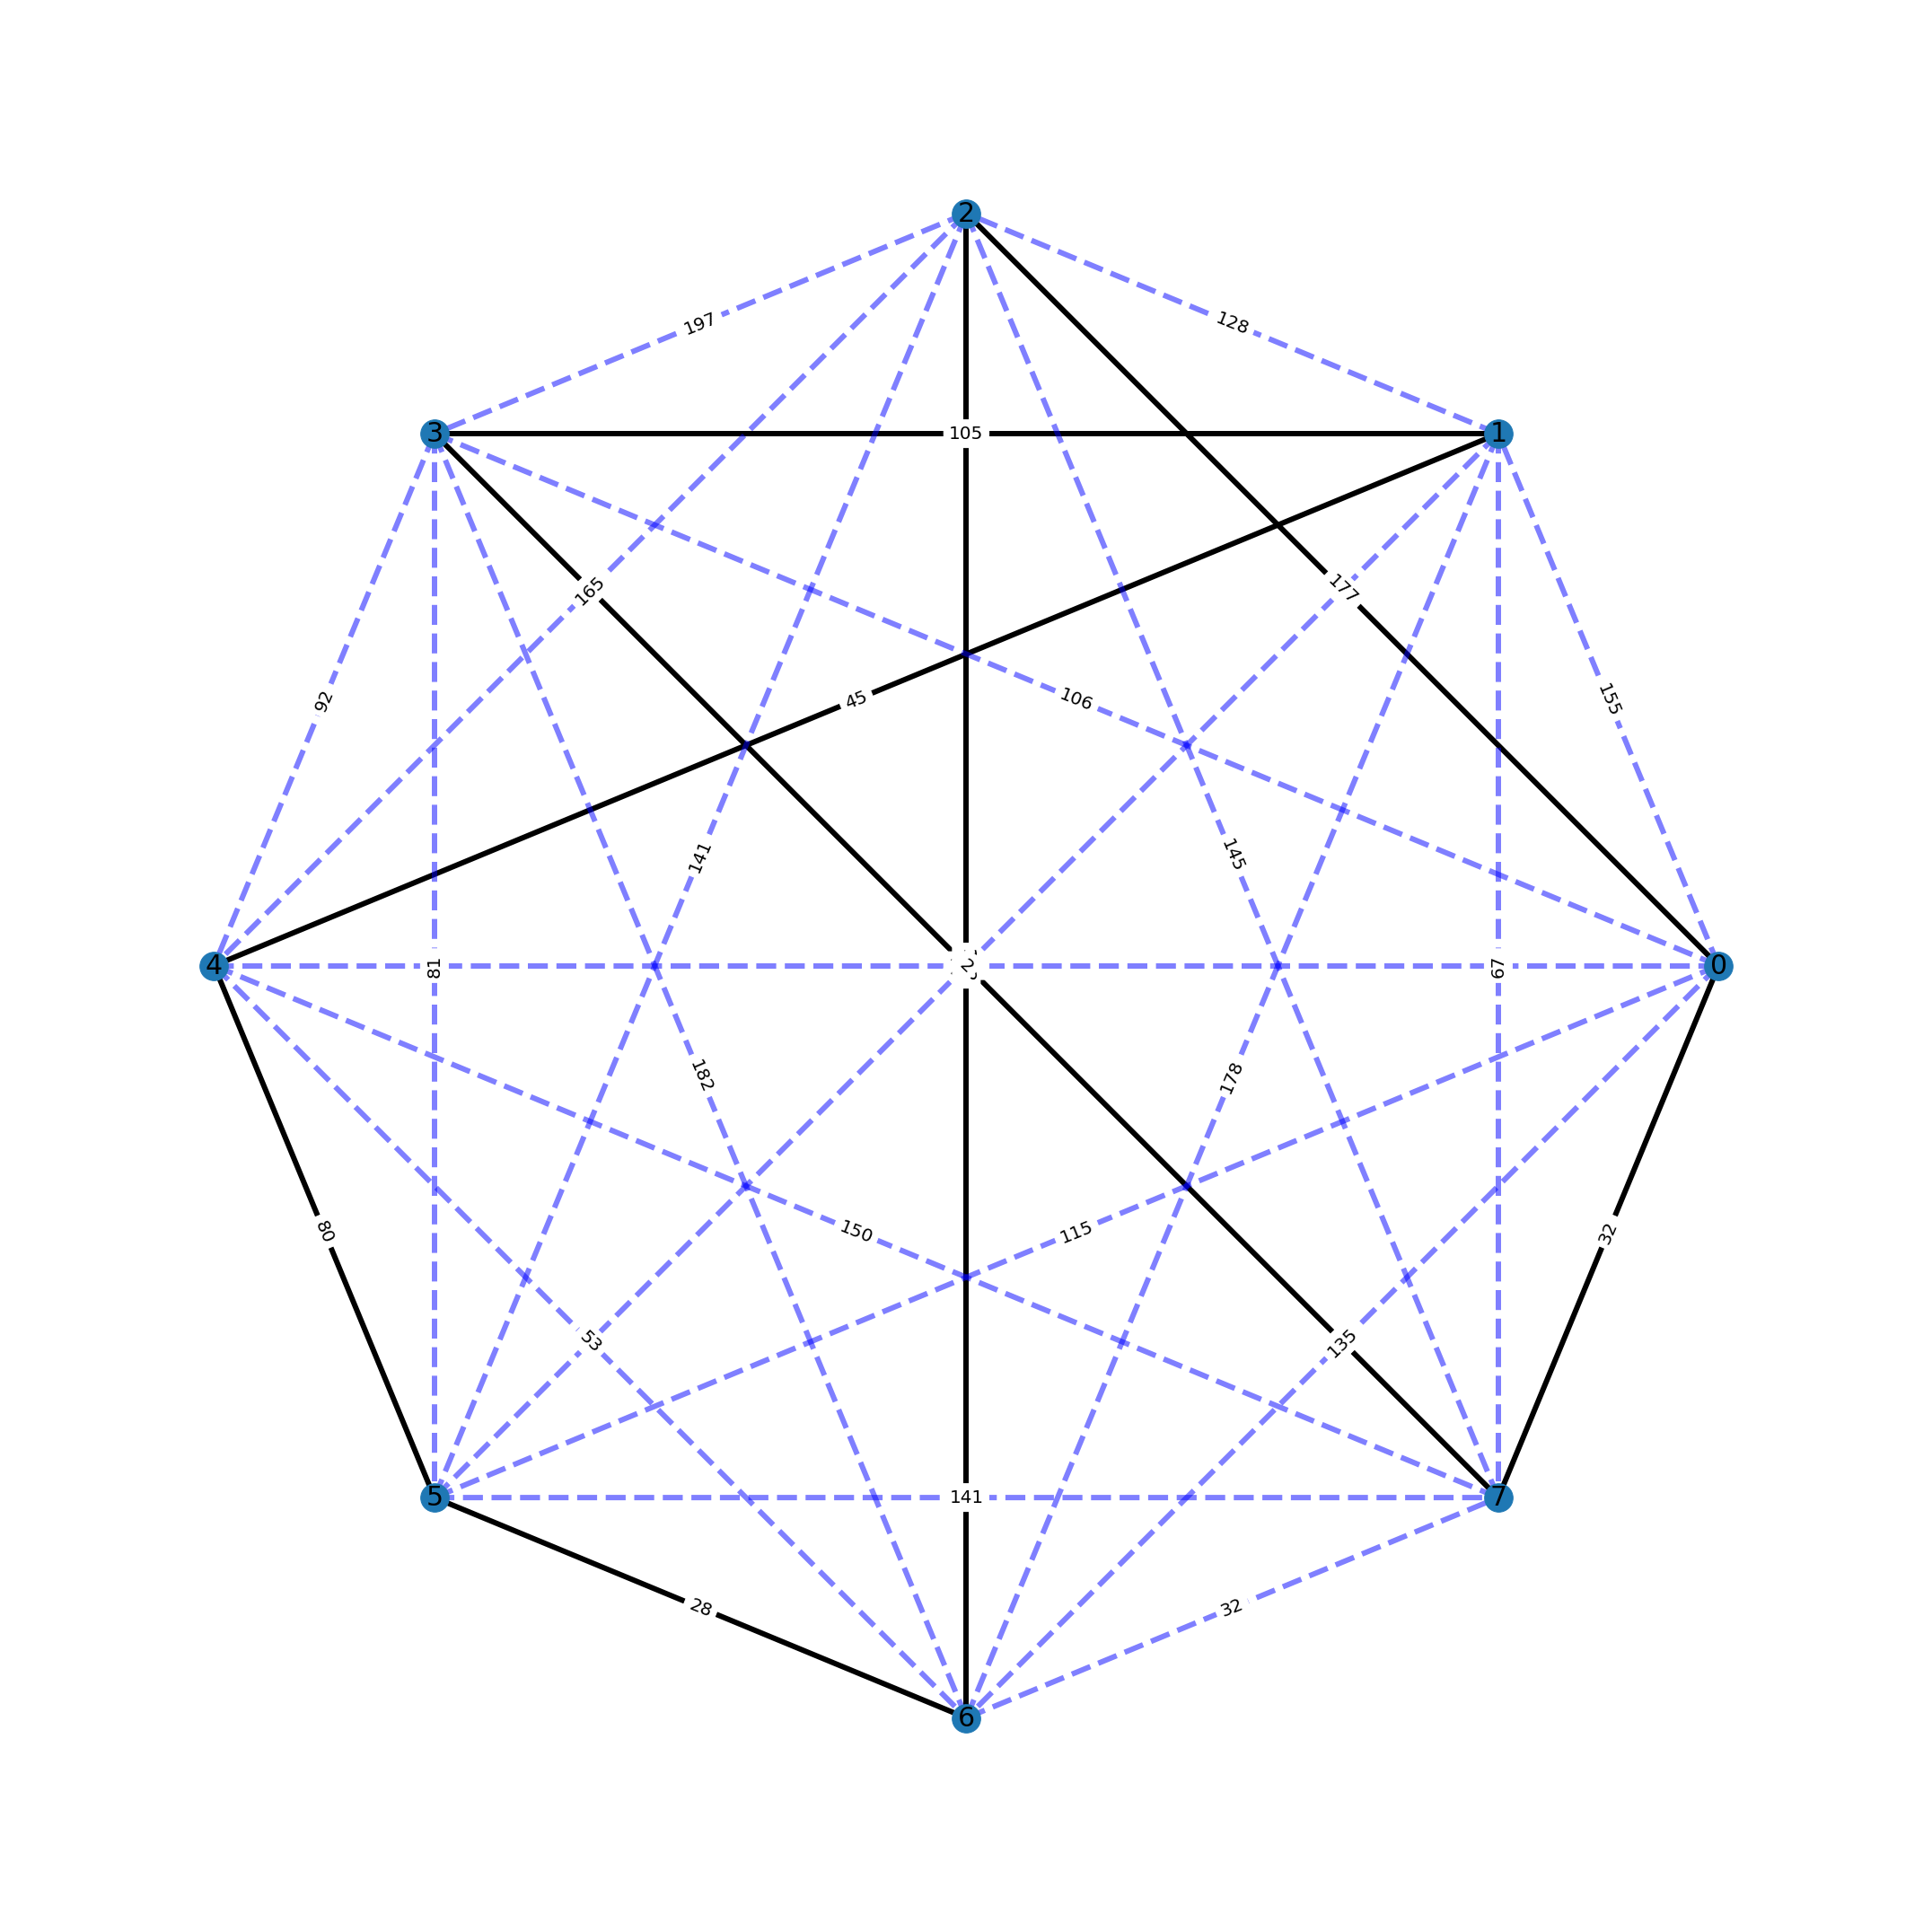

Condition got in the step 30 with cost: 581 and the tour is: [1, 4, 5, 6, 2, 0, 7, 3]


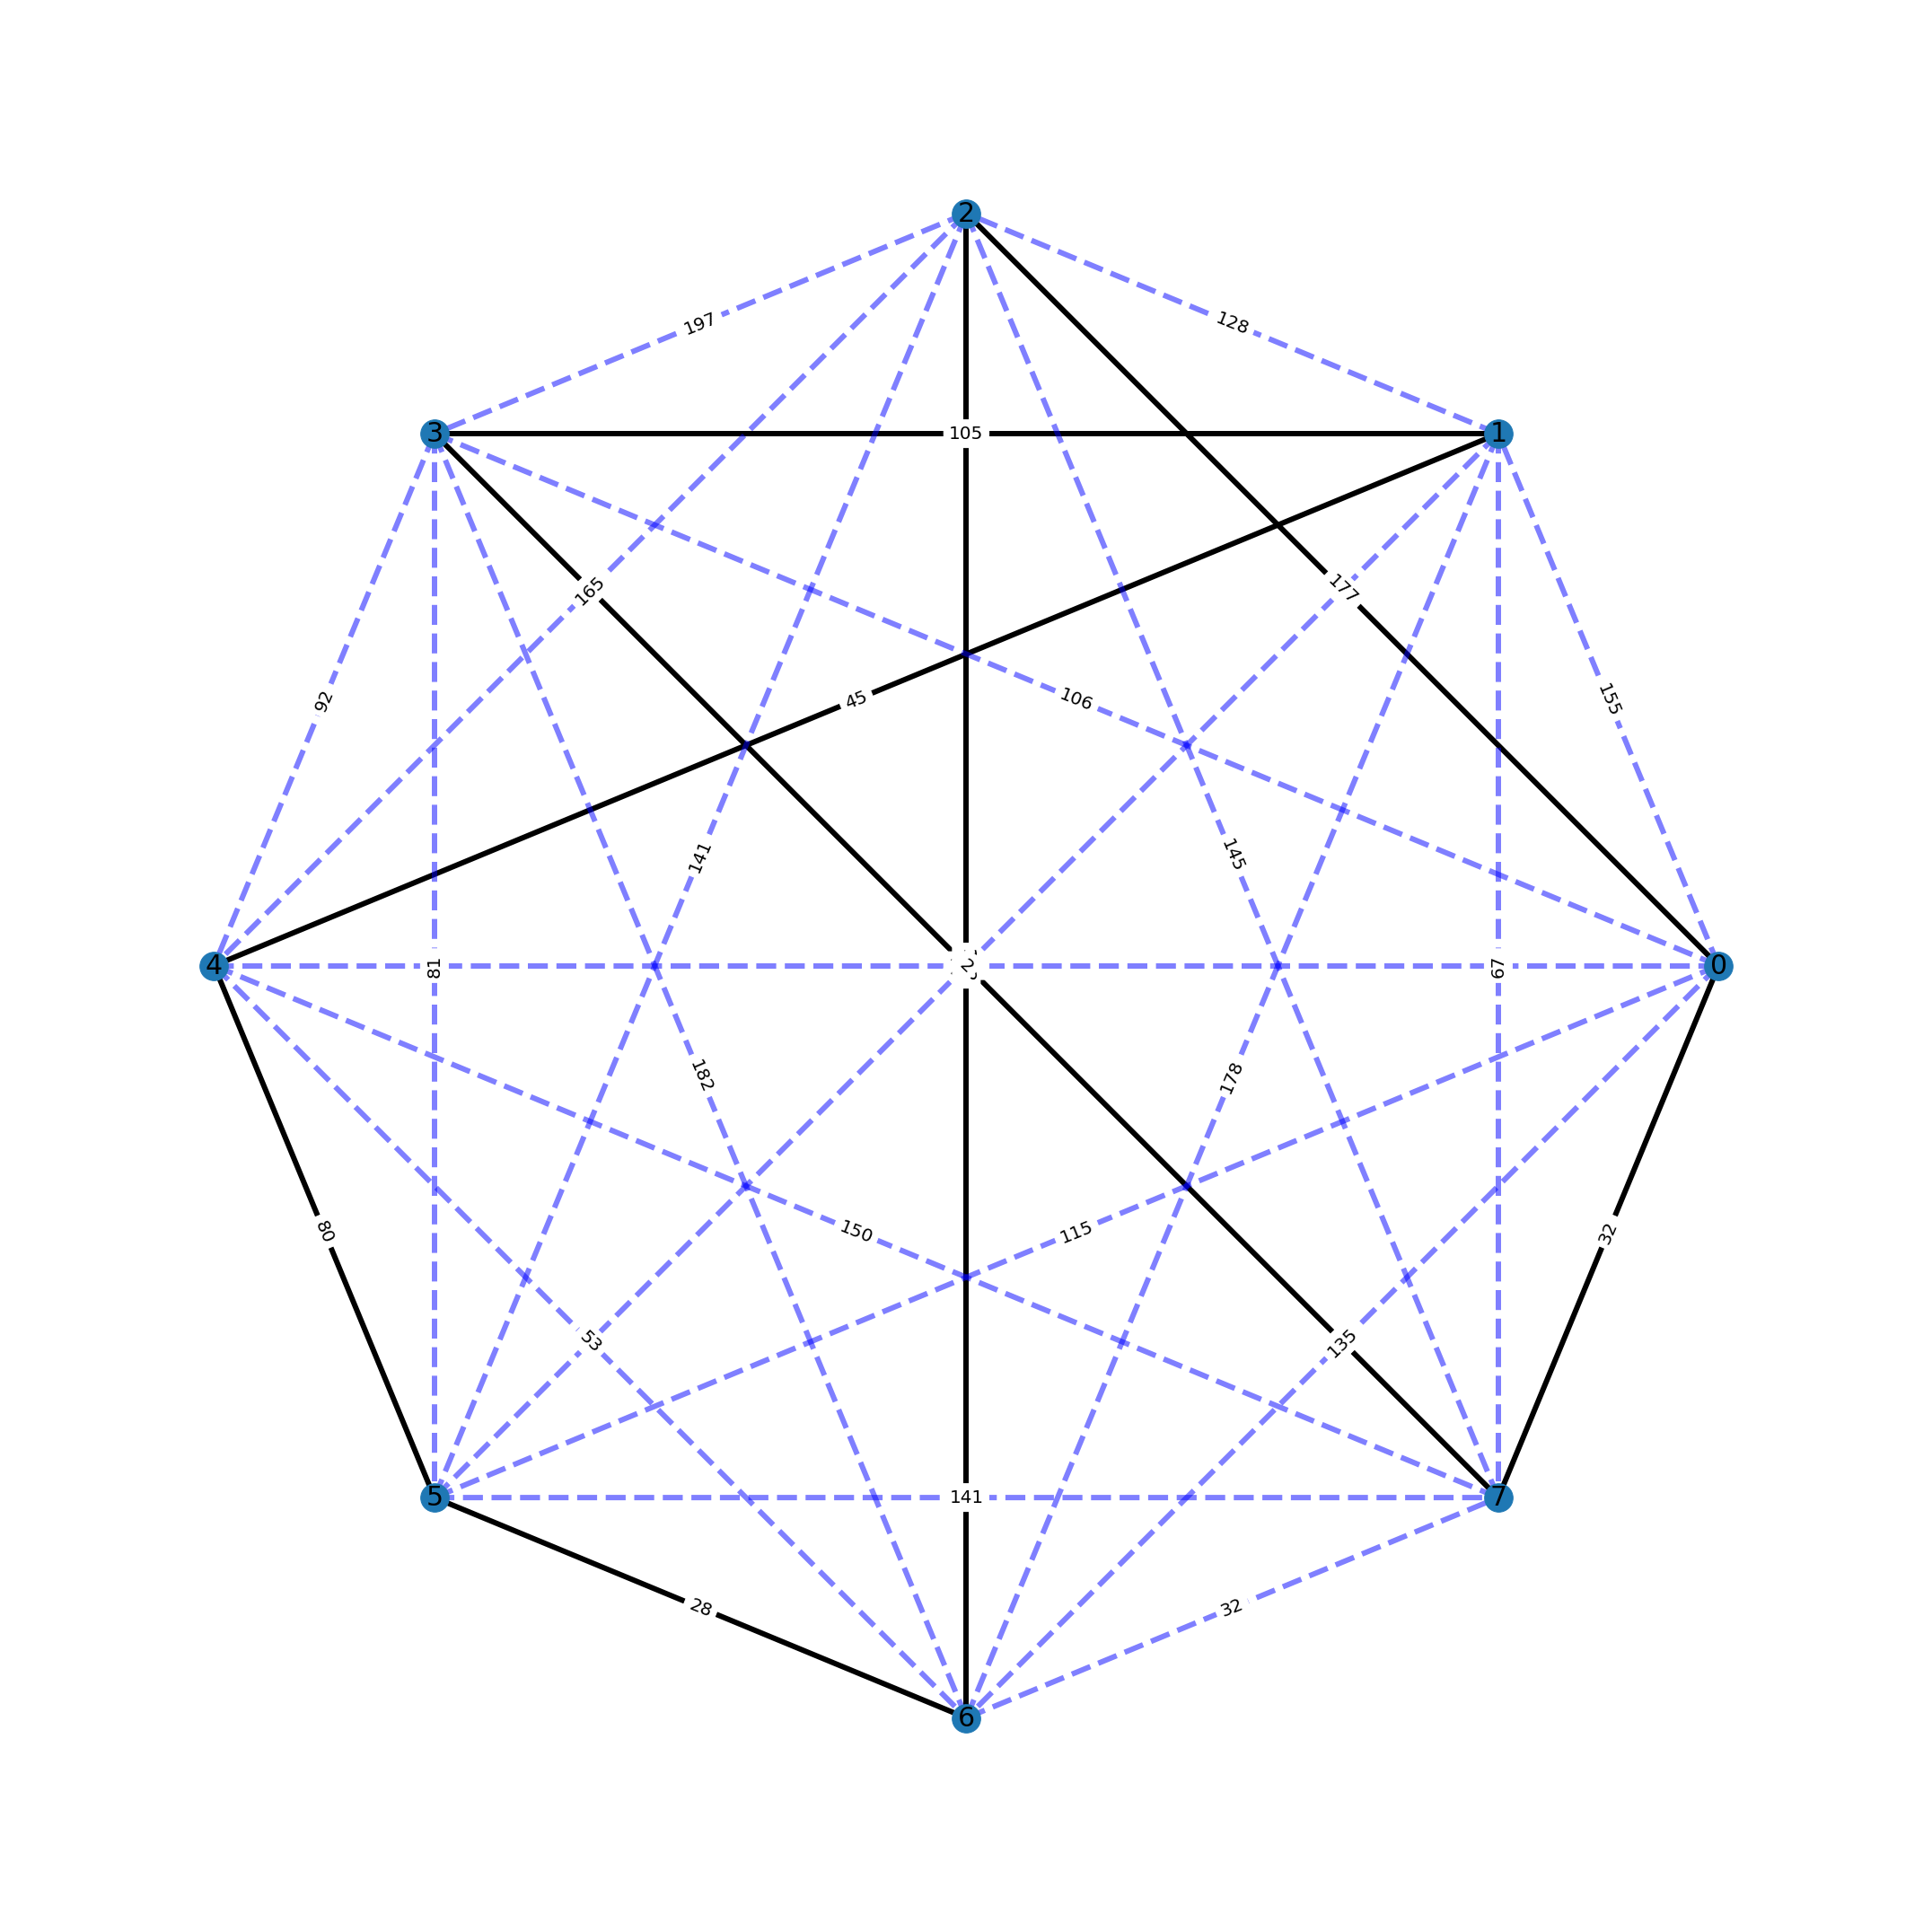

In [6]:
import datetime as dt
PRINT_RATE =3
params = {
"population_prop":1.1, "crossover_proportion":0.8,"mutation_thd":0.3, "exploration_prob":0.2
}
ga = TSPGA(nodes_list, edges_w, **params)
steps =[]
costs = []
best_tour = []
times = []
while len(costs) < 10 or  np.std(costs[-10:]) != 0:
    new_population, new_costs = ga.step()
    tour,cost = min(zip(new_population, new_costs), key=lambda el:el[1])
    tour_edges = ga.generate_sequential_pairs(tour)
    print(f"Step: {ga.step_number} - Cost: {cost}")
    steps.append(ga.step_number)
    costs.append(cost)
    best_tour.append(tour)
    if ga.step_number%PRINT_RATE == 0:
        draw_custom_weighted_graph(nodes_list, edges_w, tour_edges)
    times.append(dt.datetime.now())

print(f"Condition got in the step {steps[-1]} with cost: {costs[-1]} and the tour is: {best_tour[-1]}")

draw_custom_weighted_graph(nodes_list, edges_w, tour_edges)

<AxesSubplot:>

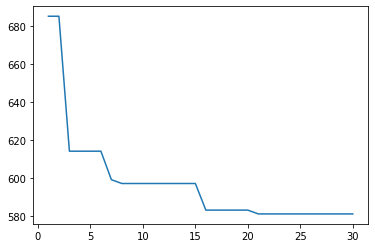

In [7]:
import seaborn as sns
sns.lineplot(x=steps, y=costs)

<AxesSubplot:>

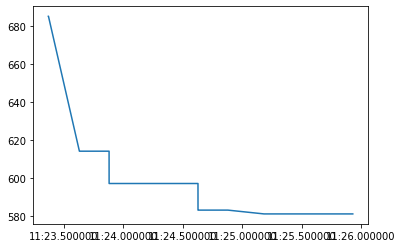

In [8]:
import seaborn as sns
sns.lineplot(x=times, y=costs)

# Testing 200 nodes

In [7]:
NUM_NODES = 200
nodes_list, edges_w = generate_network(num_nodes=NUM_NODES,rand_a=0,rand_b=200)


#draw_custom_weighted_graph(node_list=nodes_list, edge_weight_list=edges_w)

In [16]:
import json
G = {"nodes":nodes_list, "edges":edges_w}
# Write the dictionary to a file
write_dict_to_file('data/200_nodes_G.json', G)

In [17]:
G = load_dict_from_file('data/200_nodes_G.json')

In [9]:
%%time

import datetime as dt
PRINT_RATE =3
params = {
"population_prop":1.1, "crossover_proportion":0.8,"mutation_thd":0.3, "exploration_prob":0.2
}
ga = TSPGA(nodes_list, edges_w, **params)
steps =[]
costs = []
best_tour = []
times = []
while len(costs) < 10 or  np.std(costs[-10:]) != 0:
    new_population, new_costs = ga.step()
    tour,cost = min(zip(new_population, new_costs), key=lambda el:el[1])
    tour_edges = ga.generate_sequential_pairs(tour)
    print(f"Step: {ga.step_number} - Cost: {cost}")
    steps.append(ga.step_number)
    costs.append(cost)
    best_tour.append(tour)
    if ga.step_number%PRINT_RATE == 0:
        #draw_custom_weighted_graph(nodes_list, edges_w, tour_edges)
        pass
    times.append(dt.datetime.now())

print(f"Condition got in the step {steps[-1]} with cost: {costs[-1]} and the tour is: {best_tour[-1]}")

#draw_custom_weighted_graph(nodes_list, edges_w, tour_edges)

Step: 1 - Cost: 16951
Step: 2 - Cost: 15666
Step: 3 - Cost: 14510
Step: 4 - Cost: 14150
Step: 5 - Cost: 13498
Step: 6 - Cost: 12437
Step: 7 - Cost: 12028
Step: 8 - Cost: 11716
Step: 9 - Cost: 11219
Step: 10 - Cost: 10463
Step: 11 - Cost: 9797
Step: 12 - Cost: 9581
Step: 13 - Cost: 9219
Step: 14 - Cost: 8827
Step: 15 - Cost: 8395
Step: 16 - Cost: 7868
Step: 17 - Cost: 7690
Step: 18 - Cost: 7446
Step: 19 - Cost: 7197
Step: 20 - Cost: 6994
Step: 21 - Cost: 6736
Step: 22 - Cost: 6528
Step: 23 - Cost: 6423
Step: 24 - Cost: 6236
Step: 25 - Cost: 6054
Step: 26 - Cost: 5764
Step: 27 - Cost: 5541
Step: 28 - Cost: 5427
Step: 29 - Cost: 5344
Step: 30 - Cost: 5165
Step: 31 - Cost: 5025
Step: 32 - Cost: 4914
Step: 33 - Cost: 4845
Step: 34 - Cost: 4786
Step: 35 - Cost: 4679
Step: 36 - Cost: 4570
Step: 37 - Cost: 4462
Step: 38 - Cost: 4360
Step: 39 - Cost: 4318
Step: 40 - Cost: 4273
Step: 41 - Cost: 4206
Step: 42 - Cost: 4139
Step: 43 - Cost: 4107
Step: 44 - Cost: 4036
Step: 45 - Cost: 3985
Step: 46 

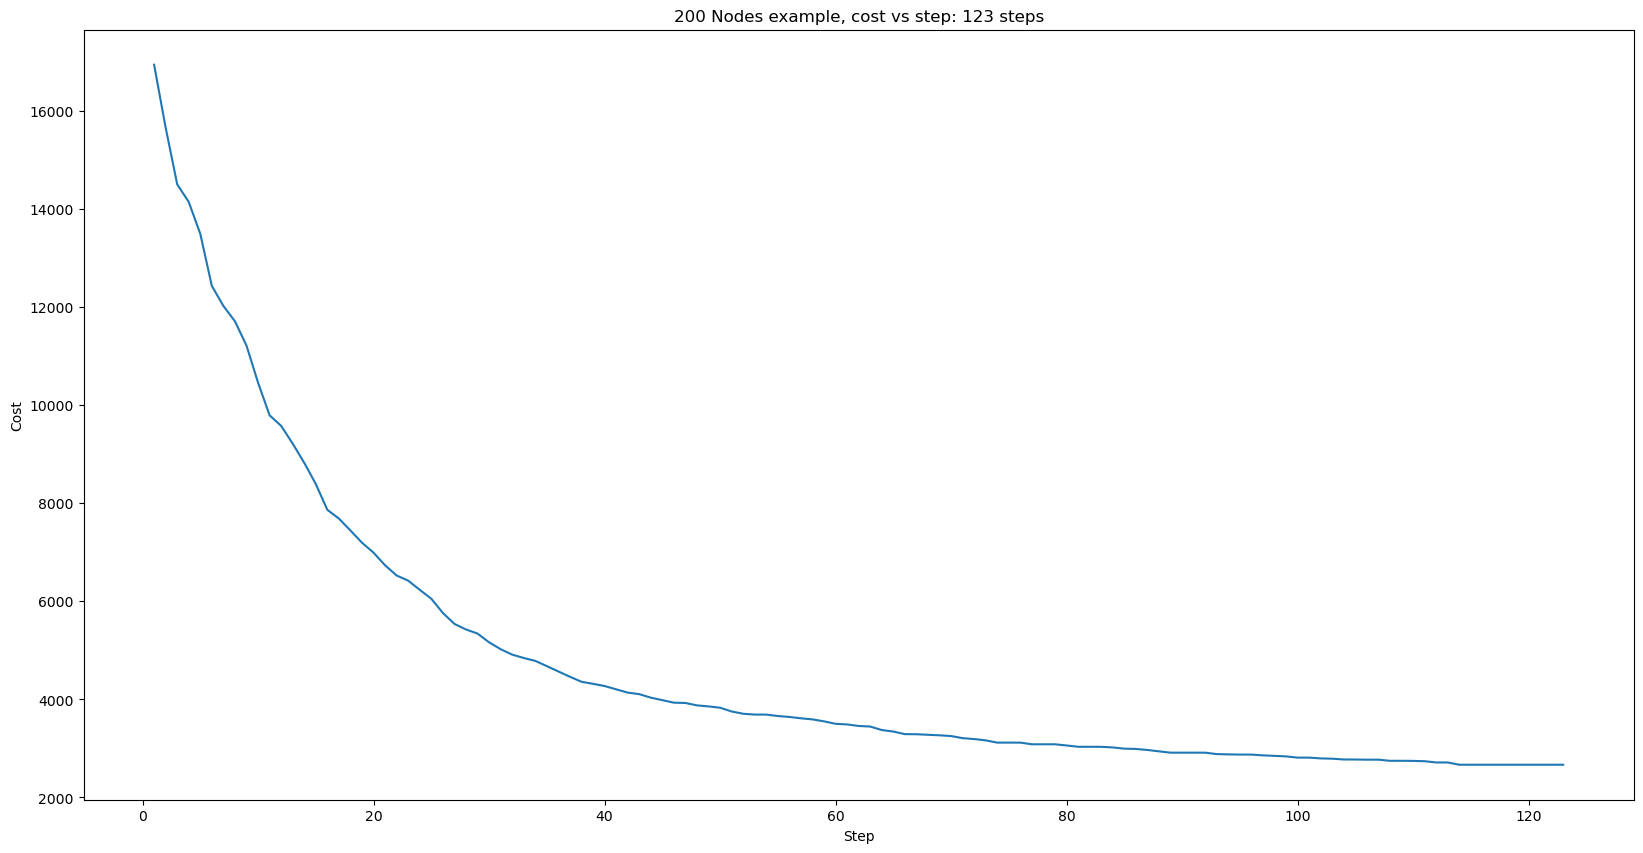

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.title(f"200 Nodes example, cost vs step: {steps[-1]} steps")
sns.lineplot(x=steps, y=costs)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.show()

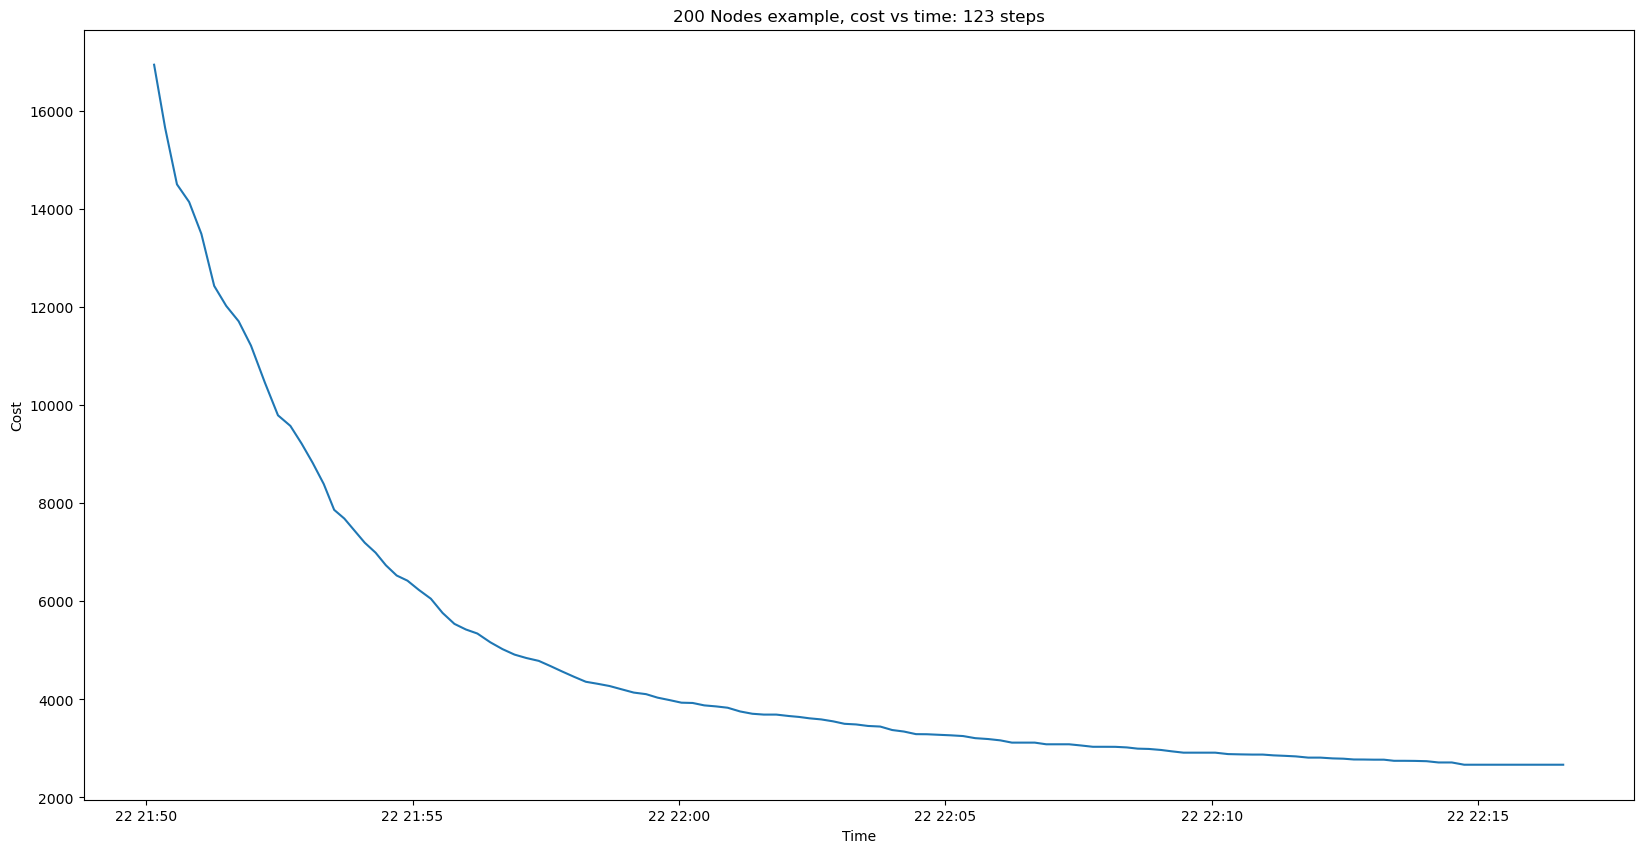

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.title(f"200 Nodes example, cost vs time: {steps[-1]} steps")
sns.lineplot(x=times, y=costs)
plt.ylabel("Cost")
plt.xlabel("Time")
plt.show()

In [19]:
GR = {"steps":steps, "costs":costs, "best_tour":best_tour}
write_dict_to_file("data/GR_200_nodes.json", GR)